### Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import pydotplus
from IPython.display import Image

### Importar datasets

#### Dataframe proceso impregnación

In [2]:
with open('dfresidual1.pkl', 'rb') as archivo:
    df = pickle.load(archivo)
df

SINUSOID  220TV111A.OUT  220PIT072.PNT  220LIC154.MEAS  \
2018-01-01 00:00:00  49.152264           95.0       0.014524        0.162538   
2018-01-01 01:00:00  73.235420           95.0       0.003413       26.806496   
2018-01-01 02:00:00  91.367134           95.0       0.003074       14.038163   
2018-01-01 03:00:00  98.295097           95.0       0.003180        6.074811   
2018-01-01 04:00:00  91.981880           65.0       0.003180        3.832892   
...                        ...            ...            ...             ...   
2023-05-31 21:00:00   8.425359          100.0       0.000000       17.781645   
2023-05-31 22:00:00   1.742280          100.0       0.000000       40.442970   
2023-05-31 23:00:00   8.084702          100.0       0.000000       11.903734   
2023-06-01 00:00:00  25.063681          100.0       0.000586       13.823203   
2023-06-01 01:00:00  49.142048          100.0       0.000586       24.752346   

                     22023009V2.PNT  220HV069.OUT  2202301301II.PNT  \
2018-01-01 00:00:00             NaN           0.0              68.0   
2018-01-01 01:00:00             NaN           0.0              68.0   
2018-01-01 02:00:00             NaN           0.0              68.0   
2018-01-01 03:00:00             NaN           0.0              68.0   
2018-01-01 04:00:00             NaN           0.0              68.0   
...                             ...           ...               ...   
2023-05-31 21:00:00           -1.67           0.0              71.0   
2023-05-31 22:00:00           -1.67           0.0              71.0   
2023-05-31 23:00:00           -1.67           0.0              71.0   
2023-06-01 00:00:00           -1.67           0.0              71.0   
2023-06-01 01:00:00           -1.67           0.0              71.0   

                     220HV102.OUT  220PV155.OUT  22023010V3.PNT  ...  \
2018-01-01 00:00:00          80.0           0.0        3.101010  ...   
2018-01-01 01:00:00          80.0           0.0        3.508585  ...   
2018-01-01 02:00:00          80.0           0.0        3.205553  ...   
2018-01-01 03:00:00          80.0           0.0        3.367718  ...   
2018-01-01 04:00:00          80.0           0.0        4.129462  ...   
...                           ...           ...             ...  ...   
2023-05-31 21:00:00          80.0           0.0       -1.670000  ...   
2023-05-31 22:00:00          80.0           0.0       -1.670000  ...   
2023-05-31 23:00:00          80.0           0.0       -1.670000  ...   
2023-06-01 00:00:00          80.0           0.0       -1.670000  ...   
2023-06-01 01:00:00          80.0           0.0       -1.670000  ...   

                     220LIT526.PNT  2202100401SI.PNT  2202100101II.PNT  \
2018-01-01 00:00:00       6.539671         37.422935         41.000000   
2018-01-01 01:00:00       6.231956         37.437691         40.000000   
2018-01-01 02:00:00       6.230475         37.884800         40.000000   
2018-01-01 03:00:00       6.193382         38.667625         40.000000   
2018-01-01 04:00:00       6.394294         38.397526         40.000000   
...                            ...               ...               ...   
2023-05-31 21:00:00      12.233044         39.652195         44.859791   
2023-05-31 22:00:00      12.358410         38.665089         43.000244   
2023-05-31 23:00:00      12.575443         39.677547         43.149021   
2023-06-01 00:00:00      12.644264         39.617573         45.527000   
2023-06-01 01:00:00      12.587933         38.834332         43.388985   

                     220TIC002.MEAS  220FIT009.PNT  220FIT011.PNT  \
2018-01-01 00:00:00       43.724609      35.645996       0.391545   
2018-01-01 01:00:00       26.665812      33.850876       0.082780   
2018-01-01 02:00:00       22.784370      35.925587       0.356169   
2018-01-01 03:00:00       23.578878      35.844582       0.330285   
2018-01-01 04:00:00       21.862959      38.925537       1.079565   
...                             ...     

#### Dataframe humedad

In [3]:
df_humedad = pd.read_excel('humedadyresidual.xlsx', index_col=0, skiprows=[0])
df_humedad = df_humedad.drop(df_humedad.columns[[0, 3]], axis=1)
df_humedad['220MIT714.PNT'] = pd.to_numeric(df_humedad['220MIT714.PNT'], errors='coerce')
df_humedad

220MIT714.PNT  SGM-SF2T02
2018-01-01 01:00:00            NaN   49.000000
2018-01-01 02:00:00            NaN   49.000000
2018-01-01 03:00:00            NaN   47.299999
2018-01-01 04:00:00            NaN   47.299999
2018-01-01 05:00:00            NaN   47.299999
...                            ...         ...
2023-06-26 21:00:00      51.164693   49.400002
2023-06-26 22:00:00      51.474363   49.400002
2023-06-26 23:00:00      51.183767   49.400002
2023-06-27 00:00:00      50.662326   49.400002
2023-06-27 01:00:00      50.790247   49.400002

[48073 rows x 2 columns]

### Unificar dataframe

In [4]:
df = df.merge(df_humedad, left_index=True, right_index=True, how='left').iloc[:-2]
df

SINUSOID  220TV111A.OUT  220PIT072.PNT  220LIC154.MEAS  \
2018-01-01 00:00:00  49.152264           95.0       0.014524        0.162538   
2018-01-01 01:00:00  73.235420           95.0       0.003413       26.806496   
2018-01-01 02:00:00  91.367134           95.0       0.003074       14.038163   
2018-01-01 03:00:00  98.295097           95.0       0.003180        6.074811   
2018-01-01 04:00:00  91.981880           65.0       0.003180        3.832892   
...                        ...            ...            ...             ...   
2023-05-31 19:00:00  50.561569          100.0       0.000527       13.487050   
2023-05-31 20:00:00  26.832241          100.0       0.000176       17.678196   
2023-05-31 21:00:00   8.425359          100.0       0.000000       17.781645   
2023-05-31 22:00:00   1.742280          100.0       0.000000       40.442970   
2023-05-31 23:00:00   8.084702          100.0       0.000000       11.903734   

                     22023009V2.PNT  220HV069.OUT  2202301301II.PNT  \
2018-01-01 00:00:00             NaN           0.0              68.0   
2018-01-01 01:00:00             NaN           0.0              68.0   
2018-01-01 02:00:00             NaN           0.0              68.0   
2018-01-01 03:00:00             NaN           0.0              68.0   
2018-01-01 04:00:00             NaN           0.0              68.0   
...                             ...           ...               ...   
2023-05-31 19:00:00           -1.67           0.0              71.0   
2023-05-31 20:00:00           -1.67           0.0              71.0   
2023-05-31 21:00:00           -1.67           0.0              71.0   
2023-05-31 22:00:00           -1.67           0.0              71.0   
2023-05-31 23:00:00           -1.67           0.0              71.0   

                     220HV102.OUT  220PV155.OUT  22023010V3.PNT  ...  \
2018-01-01 00:00:00          80.0           0.0        3.101010  ...   
2018-01-01 01:00:00          80.0           0.0        3.508585  ...   
2018-01-01 02:00:00          80.0           0.0        3.205553  ...   
2018-01-01 03:00:00          80.0           0.0        3.367718  ...   
2018-01-01 04:00:00          80.0           0.0        4.129462  ...   
...                           ...           ...             ...  ...   
2023-05-31 19:00:00          80.0           0.0       -1.670000  ...   
2023-05-31 20:00:00          80.0           0.0       -1.670000  ...   
2023-05-31 21:00:00          80.0           0.0       -1.670000  ...   
2023-05-31 22:00:00          80.0           0.0       -1.670000  ...   
2023-05-31 23:00:00          80.0           0.0       -1.670000  ...   

                     2202100101II.PNT  220TIC002.MEAS  220FIT009.PNT  \
2018-01-01 00:00:00         41.000000       43.724609      35.645996   
2018-01-01 01:00:00         40.000000       26.665812      33.850876   
2018-01-01 02:00:00         40.000000       22.784370      35.925587   
2018-01-01 03:00:00         40.000000       23.578878      35.844582   
2018-01-01 04:00:00         40.000000       21.862959      38.925537   
...                               ...             ...            ...   
2023-05-31 19:00:00         46.543571       21.012182      41.924519   
2023-05-31 20:00:00         46.346756       16.471531      37.197449   
2023-05-31 21:00:00         44.859791       15.202159      42.039055   
2023-05-31 22:00:00         43.000244       14.848001      42.329174   
2023-05-31 23:00:00         43.149021       14.492805      43.645870   

                     220FIT011.PNT  2202100402SI.PNT  2202100402II.PNT  \
2018-01-01 00:00:00       0.391545               NaN               NaN   
2018-01-01 01:00:00       0.082780               NaN               NaN   
2018-01-01 02:00:00       0.356169               NaN               NaN   
2018-01-01 03:00:00       0.330285               NaN               NaN   
2018-01-01 04:00:00       1.079565               NaN               NaN   
...                            ...

### Limpieza de datos

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

SINUSOID  220TV111A.OUT  220PIT072.PNT  220LIC154.MEAS  \
count  47450.000000   47237.000000   46816.000000    47229.000000   
mean      49.990458      32.947836       0.013710       23.835317   
std       34.042736      27.499092       0.020803       14.321952   
min        0.094695       0.000000       0.000000        0.000000   
25%       18.173460       0.000000       0.000393       13.924861   
50%       49.482986      30.000000       0.008488       25.386681   
75%       74.970779      50.000000       0.022480       33.198372   
max       99.999992     100.000000       0.915287       99.999985   

       22023009V2.PNT  220HV069.OUT  2202301301II.PNT  220HV102.OUT  \
count    45018.000000  47237.000000      46036.000000  47244.000000   
mean        -0.212108      0.248975         65.255786     80.907854   
std          1.259791      3.900098         12.323522     13.765693   
min         -1.670000      0.000000          0.000000      0.000000   
25%         -1.670000      0.000000         65.000000     80.000000   
50%          0.501338      0.000000         68.000000     85.000000   
75%          0.582058      0.000000         70.000000     85.000000   
max         26.664812    100.000000         91.485413    100.000000   

       220PV155.OUT  22023010V3.PNT  22023009V3.PNT  220FV103.OUT  \
count  47237.000000    46475.000000    46473.000000  47237.000000   
mean       2.471565        1.311004        3.859558      0.653284   
std       14.408396        3.693348        4.680294      6.645978   
min        0.000000       -1.670000       -1.670000      0.000000   
25%        0.000000       -1.670000        0.523611      0.000000   
50%        0.000000       -1.670000        3.708238      0.000000   
75%        0.000000        4.281188        6.777384      0.000000   
max      100.000000       15.665736       26.663082    100.000000   

       220FV089.OUT  220FIC103.MEAS  220SIT008B.PNT  220HV179.PNT  \
count  47238.000000    46840.000000    46842.000000  47219.000000   
mean      66.519887        0.163975       33.435481      5.876960   
std       16.129545        2.085323        8.947408      0.428454   
min        0.000000        0.000000        0.000000      2.000000   
25%       65.000000        0.000191       33.638954      6.000000   
50%       70.000000        0.000948       36.696241      6.000000   
75%       73.000000        0.001653       37.982173      6.000000   
max      100.000000       49.999813       43.366879      6.000000   

       220SIT157.PNT  22023008V3.PNT  220FV065B.BIAS  220FV065C.BIAS  \
count   46839.000000    45017.000000    47222.000000         47215.0   
mean        5.718907       13.300949       -0.211656             0.0   
std         1.219172       10.864302        0.485495             0.0   
min         0.000000       -1.670000      -10.000000             0.0   
25%         6.000000        5.116527        0.000000             0.0   
50%         6.000000        8.481743        0.000000             0.0   
75%         6.000000       26.663082        0.000000             0.0   
max         6.000000       26.664812        0.500000             0.0   

       220PIT061.PNT  22023010V2.PNT  22023008V2.PNT  220HV059.OUT  \
count   46842.000000    46476.000000    45037.000000  47237.000000   
mean        3.838774        1.121131       10.877364      0.719279   
std         0.791539        2.097958       13.233867      7.649142   
min         0.000000       -1.670000       -1.670000      0.000000   
25%         3.959814        0.509046        0.572063      0.000000   
50%         4.024752        0.601057        0.723776      0.000000   
75%         4.076647        0.974429       26.663082      0.000000   
max         6.999013       26.663082       26.664812    100.000000   

       220PRODUCAO.RO0011  220TIT105.PNT  220PDI074.PNT  220VIT066.PNT  \
count        4.688800e+04   46714.000000   47222.000000   4.684200e+04   
mean         2.339784e+33      97.501447      -0.118030   1.146852e+01   
std

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47458 entries, 2018-01-01 00:00:00 to 2023-05-31 23:00:00
Columns: 137 entries, SINUSOID to SGM-SF2T02
dtypes: float64(137)
memory usage: 50.0 MB


#### Columnas con valores nulos (NaN)

In [7]:
null = (df.isna().sum()/len(df)*100).round(1)
null = null[null >= 10].sort_values(ascending=False)
print(null)

2202100402SI.PNT    100.0
2202100402II.PNT    100.0
220VIT066B.PNT       85.8
270_AA_L7.PNT        68.6
270_S_L7.PNT         68.6
220FIT852.PNT        23.8
220MIT714.PNT        20.0
220TIT851.PNT        11.7
220TIT850.PNT        11.6
dtype: float64


In [8]:
print("La longitud de null es:",len(null))

La longitud de null es: 9


In [9]:
print("Variables con más cantidad de nulos:")
print(list(null.index))

Variables con más cantidad de nulos:
['2202100402SI.PNT', '2202100402II.PNT', '220VIT066B.PNT', '270_AA_L7.PNT', '270_S_L7.PNT', '220FIT852.PNT', '220MIT714.PNT', '220TIT851.PNT', '220TIT850.PNT']


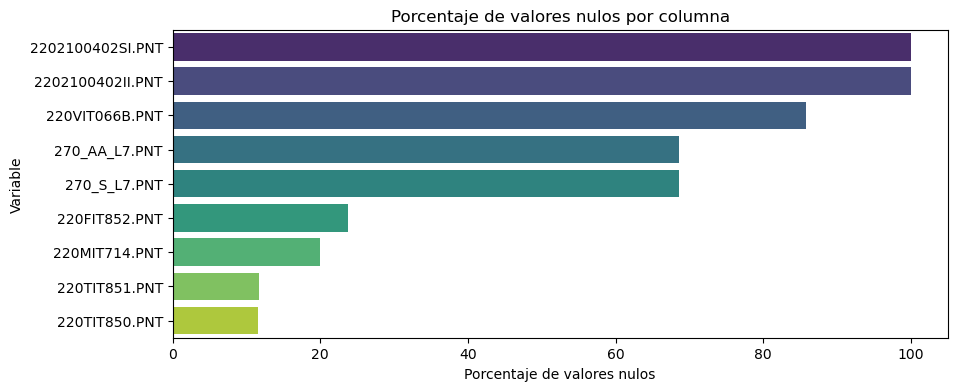

In [10]:
plt.figure(figsize=(10, 4))
sns.barplot(x=null.values, y=null.index, palette='viridis')

plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Variable')
plt.title('Porcentaje de valores nulos por columna')

plt.show()

#### Columnas con valores ceros 

In [11]:
zero = ((df == 0).sum()/len(df)*100).round(1)
zero = zero[zero >= 10].sort_values(ascending=False)
print(zero)

220FV065C.BIAS    99.5
220HV069.OUT      98.7
220AIT010.PNT     98.7
220HV059.OUT      98.2
220FV103.OUT      98.1
220PV034A.OUT     96.1
220PV019A.OUT     94.5
220PV155.OUT      93.4
220FV065B.BIAS    82.9
220TV529.OUT      74.5
220PIC262A.OUT    62.4
220TV533.OUT      48.1
220TIT091.PNT     44.1
220TIT092.PNT     26.9
220TV111A.OUT     25.6
220TV015.OUT      21.2
220PIT072.PNT     17.1
220TV014.OUT      15.2
220TV002.OUT      13.9
220TV007.OUT      12.3
220FIC103.MEAS    11.1
dtype: float64


In [12]:
print("La longitud de zero es:",len(zero))

La longitud de zero es: 21


In [13]:
print("Variables con más cantidad de ceros:")
print(list(zero.index))

Variables con más cantidad de ceros:
['220FV065C.BIAS', '220HV069.OUT', '220AIT010.PNT', '220HV059.OUT', '220FV103.OUT', '220PV034A.OUT', '220PV019A.OUT', '220PV155.OUT', '220FV065B.BIAS', '220TV529.OUT', '220PIC262A.OUT', '220TV533.OUT', '220TIT091.PNT', '220TIT092.PNT', '220TV111A.OUT', '220TV015.OUT', '220PIT072.PNT', '220TV014.OUT', '220TV002.OUT', '220TV007.OUT', '220FIC103.MEAS']


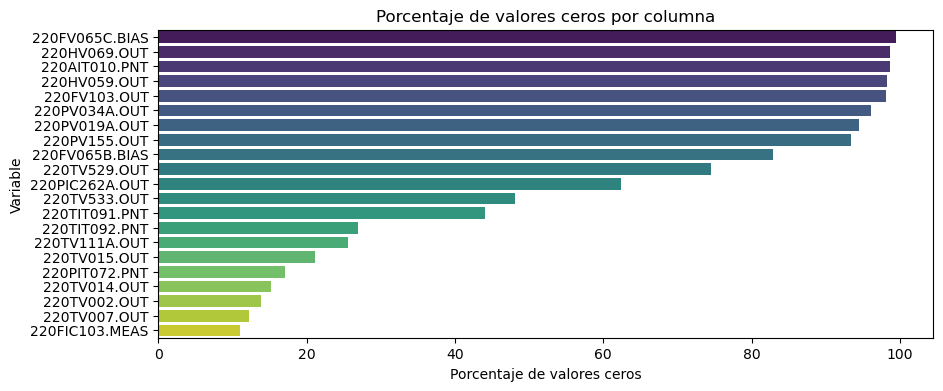

In [14]:
plt.figure(figsize=(10, 4))
sns.barplot(x=zero.values, y=zero.index, palette='viridis')

plt.xlabel('Porcentaje de valores ceros')
plt.ylabel('Variable')
plt.title('Porcentaje de valores ceros por columna')

plt.show()

#### Columnas repetidas (con valores distintos a ceros)

In [15]:
repetidos_distintos_de_cero = ((df[df != 0].apply(lambda x: x.value_counts().max()) / len(df)) * 100).round(1)
repetidos_distintos_de_cero = repetidos_distintos_de_cero[repetidos_distintos_de_cero >= 10].sort_values(ascending=False)
print(repetidos_distintos_de_cero)

220SIT157.PNT       91.7
220PIT009.PNT       87.0
220HV179.PNT        82.8
220TV015.OUT        74.2
220TV014.OUT        56.9
22023010V3.PNT      51.2
220HV102.OUT        46.7
220FV089.OUT        39.6
22023008V2.PNT      39.0
22023008V3.PNT      35.7
22023009V2.PNT      33.3
2202604801SI.PNT    30.6
2202100401II.PNT    24.9
220TV007.OUT        19.0
22023009V3.PNT      19.0
220TIT009.PNT       18.2
2202100101II.PNT    16.8
220FV065B.BIAS      13.3
220TV002.OUT        12.4
dtype: float64


In [16]:
print("La longitud de repetidos distintos de cero es:",len(repetidos_distintos_de_cero))

La longitud de repetidos distintos de cero es: 19


In [17]:
print("Variables con más cantidad de repetidos distintos de cero:")
print(list(repetidos_distintos_de_cero.index))

Variables con más cantidad de repetidos distintos de cero:
['220SIT157.PNT', '220PIT009.PNT', '220HV179.PNT', '220TV015.OUT', '220TV014.OUT', '22023010V3.PNT', '220HV102.OUT', '220FV089.OUT', '22023008V2.PNT', '22023008V3.PNT', '22023009V2.PNT', '2202604801SI.PNT', '2202100401II.PNT', '220TV007.OUT', '22023009V3.PNT', '220TIT009.PNT', '2202100101II.PNT', '220FV065B.BIAS', '220TV002.OUT']


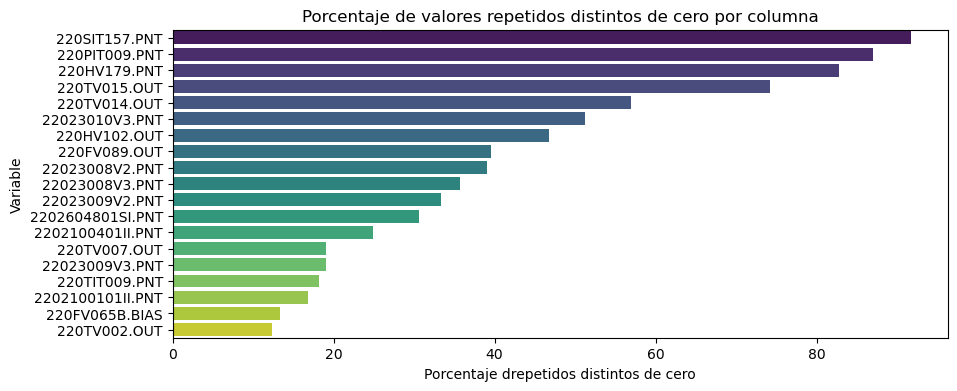

In [18]:
plt.figure(figsize=(10, 4))
sns.barplot(x=repetidos_distintos_de_cero.values, y=repetidos_distintos_de_cero.index, palette='viridis')

plt.xlabel('Porcentaje drepetidos distintos de cero')
plt.ylabel('Variable')
plt.title('Porcentaje de valores repetidos distintos de cero por columna')

plt.show()

#### Filas duplicadas

In [19]:
df[df.duplicated()]

SINUSOID  220TV111A.OUT  220PIT072.PNT  220LIC154.MEAS  \
2018-06-01 01:00:00  49.189198       0.000000       0.041100        9.651211   
2019-01-01 00:00:00  49.452457      35.000000       0.008482        2.324809   
2019-06-01 01:00:00  49.122635      30.000000       0.013322       23.735416   
2020-01-01 00:00:00  49.146690      20.000000       0.014682        0.150240   
2020-06-01 01:00:00  49.130020       0.000000       0.004003       28.678530   
2021-01-01 00:00:00  49.146690       0.000000       0.000000       29.248812   
2021-06-01 01:00:00  49.453728      35.000000       0.000000       19.933762   
2022-01-01 00:00:00  49.456264      38.775970       0.000969       36.542206   
2022-06-01 01:00:00  49.174057      23.467352       0.000879       19.796022   
2023-01-01 00:00:00  49.442307      95.000000       0.012480       18.982958   

                     22023009V2.PNT  220HV069.OUT  2202301301II.PNT  \
2018-06-01 01:00:00        0.627125      0.000000              68.0   
2019-01-01 00:00:00        0.591542      0.000000              64.0   
2019-06-01 01:00:00        0.622247      0.000000              64.0   
2020-01-01 00:00:00        0.677407      0.000000              46.0   
2020-06-01 01:00:00       -1.670000      0.000000              69.0   
2021-01-01 00:00:00        0.522802      0.000000              72.0   
2021-06-01 01:00:00       -1.670000      0.000000              70.0   
2022-01-01 00:00:00       -1.670000      0.000000              67.0   
2022-06-01 01:00:00        1.779739     18.099718              69.0   
2023-01-01 00:00:00       -1.670000      0.000000              70.0   

                     220HV102.OUT  220PV155.OUT  22023010V3.PNT  \
2018-06-01 01:00:00          80.0           0.0        4.750014   
2019-01-01 00:00:00          80.0           0.0        5.223834   
2019-06-01 01:00:00          85.0           0.0        6.069829   
2020-01-01 00:00:00          85.0           0.0        5.049396   
2020-06-01 01:00:00          80.0           0.0        4.164020   
2021-01-01 00:00:00          80.0           0.0       -1.670000   
2021-06-01 01:00:00          80.0           0.0       -1.670000   
2022-01-01 00:00:00          80.0           0.0        4.822854   
2022-06-01 01:00:00          80.0           0.0        0.331003   
2023-01-01 00:00:00          85.0           0.0       -1.670000   

                     22023009V3.PNT  220FV103.OUT  220FV089.OUT  \
2018-06-01 01:00:00        5.092075      0.000000     70.000000   
2019-01-01 00:00:00        2.109642      0.000000     75.000000   
2019-06-01 01:00:00        5.528486      0.000000     70.000000   
2020-01-01 00:00:00       -1.670000      0.000000     80.000000   
2020-06-01 01:00:00        7.089653      0.000000     70.000000   
2021-01-01 00:00:00        6.980793      0.000000     70.000000   
2021-06-01 01:00:00        6.185156      0.000000     75.000000   
2022-01-01 00:00:00        8.387124      0.000000     49.000000   
2022-06-01 01:00:00        1.530791     15.079356     66.066643   
2023-01-01 00:00:00        1.599166      0.000000     65.000000   

                     220FIC103.MEAS  220SIT008B.PNT  220HV179.PNT  \
2018-06-01 01:00:00        0.000976       37.373535           6.0   
2019-01-01 00:00:00        0.000201       32.617336           6.0   
2019-06-01 01:00:00        0.001344       38.052193           6.0   
2020-01-01 00:00:00        0.000225       12.582781           5.0   
2020-06-01 01:00:00        0.000100       36.560608           6.0   
2021-01-01 00:00:00        0.000000       35.459503           6.0   
2021-06-01 01:00:00        0.000842       34.382740           6.0   
2022-01-01 00:00:00        0.000000       36.452255           6.0   
2022-06-01 01:00:00        0.005482       38.594734           6.0   
2023-01-01 00:00:00        0.002417       38.673103           6.0   

                     220SIT157.PNT  22023008V3.PNT  220FV065B.BIAS  \
2018-06-01 01:00:00       6.000000        6.513075   

In [20]:
print(df[df.duplicated()].shape)

(10, 137)


In [21]:
print("Filas con valores duplicados:")
print(df[df.duplicated()].index)

Filas con valores duplicados:
DatetimeIndex(['2018-06-01 01:00:00', '2019-01-01 00:00:00',
               '2019-06-01 01:00:00', '2020-01-01 00:00:00',
               '2020-06-01 01:00:00', '2021-01-01 00:00:00',
               '2021-06-01 01:00:00', '2022-01-01 00:00:00',
               '2022-06-01 01:00:00', '2023-01-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)


#### Eliminar valores nulos y repetidos

In [22]:
def eliminar_columnas_nan_y_repetidos(df, umbral_nan=0.4, umbral_repetidos=0.4):
    num_filas = df.shape[0]
    columnas_a_eliminar_nan = []  # Columnas eliminadas debido a NaN
    columnas_a_eliminar_repetidos = []  # Columnas eliminadas debido a valores repetidos
    mensajes_eliminar = []

    for columna in df.columns:
        valores_nan = df[columna].isnull().sum()
        porcentaje_nan = valores_nan / num_filas

        if porcentaje_nan > umbral_nan:
            columnas_a_eliminar_nan.append(columna)
            mensajes_eliminar.append(f"La columna '{columna}' ha sido eliminada porque contiene {porcentaje_nan*100:.2f}% de valores NaN.")
        else:
            valores_repetidos = df[columna].value_counts().iloc[0]
            porcentaje_repetidos = valores_repetidos / num_filas

            if porcentaje_repetidos > umbral_repetidos:
                columnas_a_eliminar_repetidos.append(columna)
                valor_repetido = df[columna].value_counts().idxmax()  # Valor más repetido
                mensajes_eliminar.append(f"La columna '{columna}' ha sido eliminada debido a que el valor '{valor_repetido}' se repite en más del {porcentaje_repetidos*100:.2f}% de las filas.")

    df_filtrado = df.drop(columnas_a_eliminar_nan + columnas_a_eliminar_repetidos, axis=1)

    if len(mensajes_eliminar) > 0:
        print("Mensajes de eliminación:")
        for mensaje in mensajes_eliminar:
            print(mensaje)

    return df_filtrado

In [23]:
df.shape

(47458, 137)

In [24]:
df=eliminar_columnas_nan_y_repetidos(df)

Mensajes de eliminación:
La columna '220HV069.OUT' ha sido eliminada debido a que el valor '0.0' se repite en más del 98.68% de las filas.
La columna '220HV102.OUT' ha sido eliminada debido a que el valor '80.0' se repite en más del 46.66% de las filas.
La columna '220PV155.OUT' ha sido eliminada debido a que el valor '0.0' se repite en más del 93.40% de las filas.
La columna '22023010V3.PNT' ha sido eliminada debido a que el valor '-1.6699999570846558' se repite en más del 51.18% de las filas.
La columna '220FV103.OUT' ha sido eliminada debido a que el valor '0.0' se repite en más del 98.07% de las filas.
La columna '220HV179.PNT' ha sido eliminada debido a que el valor '6.0' se repite en más del 82.76% de las filas.
La columna '220SIT157.PNT' ha sido eliminada debido a que el valor '6.0' se repite en más del 91.75% de las filas.
La columna '220FV065B.BIAS' ha sido eliminada debido a que el valor '0.0' se repite en más del 82.90% de las filas.
La columna '220FV065C.BIAS' ha sido elimi

In [25]:
df.shape

(47458, 112)

#### Eliminar filas duplicadas

In [26]:
df = df.drop_duplicates()

In [27]:
df.shape

(47448, 112)

### Exploración de datos

#### Definir variable de interes: Residual de transferencia

In [28]:
target_feature = '220AIT473.PNT'

#### Serie de tiempo de la variable de interes

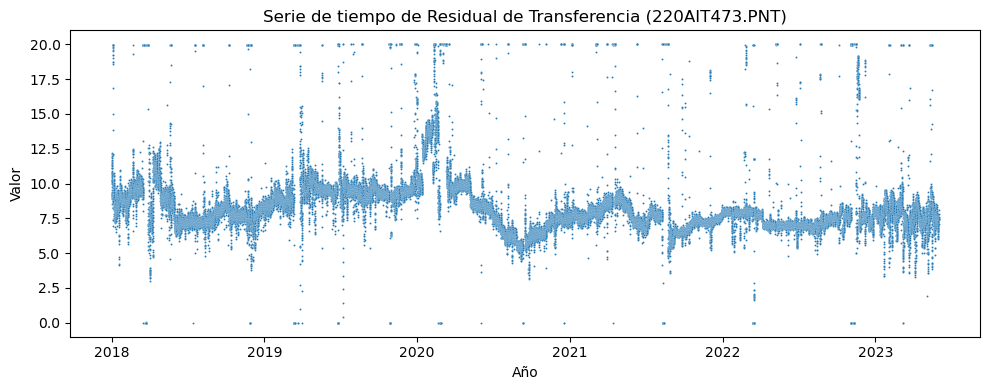

In [29]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.index, y=df[target_feature], s=2)
plt.title(f'Serie de tiempo de Residual de Transferencia (220AIT473.PNT)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

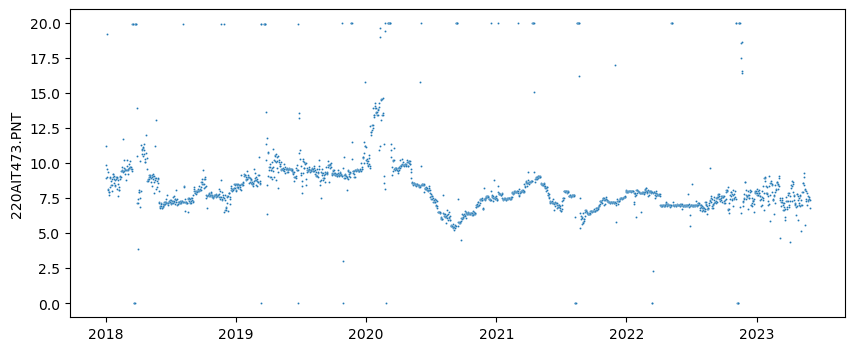

In [30]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df[target_feature].resample('D').median().index, y=df[target_feature].resample('D').median(), s=2)
plt.show()

#### Filtro de producción

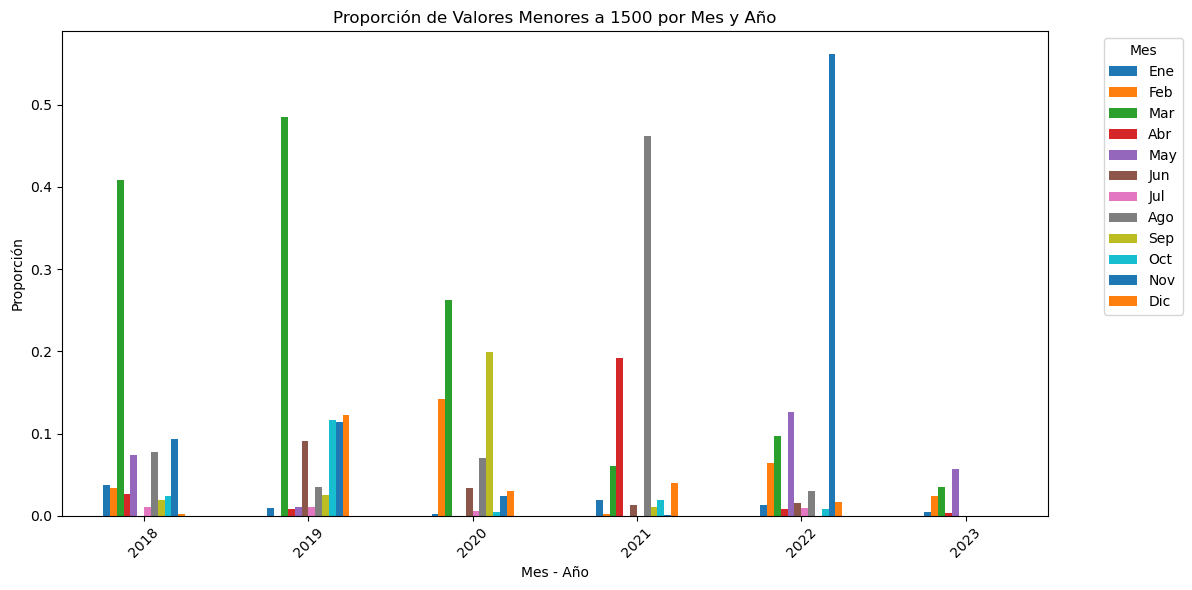

In [31]:
df['AÑO'] = df.index.year
df['MES'] = df.index.month

conteos = df[df['220YIC008.MEAS'] < 1500].groupby(['AÑO', 'MES']).size().unstack().fillna(0)
total_datos = df.groupby(['AÑO', 'MES']).size().unstack().fillna(0)
proporciones = (conteos / total_datos)
proporciones = proporciones.rename(columns={1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'})

proporciones.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proporción de Valores Menores a 1500 por Mes y Año')
plt.xlabel('Mes - Año')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
filtro_producciónSF2 = df['220YIC008.MEAS']>= 1500 #adt/d
df = df[filtro_producciónSF2]

In [33]:
df.shape

(43926, 114)

In [34]:
df

SINUSOID  220TV111A.OUT  220PIT072.PNT  220LIC154.MEAS  \
2018-01-01 00:00:00  49.152264           95.0       0.014524        0.162538   
2018-01-01 01:00:00  73.235420           95.0       0.003413       26.806496   
2018-01-01 02:00:00  91.367134           95.0       0.003074       14.038163   
2018-01-01 03:00:00  98.295097           95.0       0.003180        6.074811   
2018-01-01 04:00:00  91.981880           65.0       0.003180        3.832892   
...                        ...            ...            ...             ...   
2023-05-31 19:00:00  50.561569          100.0       0.000527       13.487050   
2023-05-31 20:00:00  26.832241          100.0       0.000176       17.678196   
2023-05-31 21:00:00   8.425359          100.0       0.000000       17.781645   
2023-05-31 22:00:00   1.742280          100.0       0.000000       40.442970   
2023-05-31 23:00:00   8.084702          100.0       0.000000       11.903734   

                     22023009V2.PNT  2202301301II.PNT  22023009V3.PNT  \
2018-01-01 00:00:00             NaN              68.0        1.728984   
2018-01-01 01:00:00             NaN              68.0        2.490404   
2018-01-01 02:00:00             NaN              68.0        2.647163   
2018-01-01 03:00:00             NaN              68.0        2.584136   
2018-01-01 04:00:00             NaN              68.0        1.944880   
...                             ...               ...             ...   
2023-05-31 19:00:00           -1.67              71.0       -1.670000   
2023-05-31 20:00:00           -1.67              71.0       -1.670000   
2023-05-31 21:00:00           -1.67              71.0       -1.670000   
2023-05-31 22:00:00           -1.67              71.0       -1.670000   
2023-05-31 23:00:00           -1.67              71.0       -1.670000   

                     220FV089.OUT  220FIC103.MEAS  220SIT008B.PNT  \
2018-01-01 00:00:00          70.0        0.013672       38.012939   
2018-01-01 01:00:00          70.0        0.013672       37.868355   
2018-01-01 02:00:00          70.0        0.013671       38.367470   
2018-01-01 03:00:00          70.0        0.013672       39.135635   
2018-01-01 04:00:00          70.0        0.013667       38.771118   
...                           ...             ...             ...   
2023-05-31 19:00:00          70.0        0.003315       39.787636   
2023-05-31 20:00:00          70.0        0.003315       39.665485   
2023-05-31 21:00:00          70.0        0.003315       39.698544   
2023-05-31 22:00:00          70.0        0.003315       38.804073   
2023-05-31 23:00:00          70.0        0.004335       39.762939   

                     22023008V3.PNT  220PIT061.PNT  22023010V2.PNT  \
2018-01-01 00:00:00             NaN       3.993443        0.533826   
2018-01-01 01:00:00             NaN       4.020220        0.604638   
2018-01-01 02:00:00             NaN       3.988515        0.554907   
2018-01-01 03:00:00             NaN       4.035613        0.481609   
2018-01-01 04:00:00             NaN       4.057813        0.534366   
...                             ...            ...             ...   
2023-05-31 19:00:00       26.663082       4.014003        2.777636   
2023-05-31 20:00:00       26.663082       4.014003        2.931349   
2023-05-31 21:00:00       26.663082       4.014003        2.677785   
2023-05-31 22:00:00       26.663082       4.014003        2.738212   
2023-05-31 23:00:00       26.663082       4.014003        2.640180   

                     22023008V2.PNT  220PRODUCAO.RO0011  220TIT105.PNT  \
2018-01-01 00:00:00             NaN            2.740553     101.214600   
2018-01-01 01:00:00             NaN            2.786676     101.071777   
2018-01-01 02:00:00             NaN            2.746373     101.008911   
2018-01-01 03:00:00             NaN            2.885366     100.761719   
2018-01-01 04:00:00             NaN            2.827063     100.771484   
...                             ...                 ...            ...

#### Serie de tiempo de la variable de interes sin outliers

In [35]:
def replace_outliers_with_nan(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column.loc[(column < lower_bound) | (column > upper_bound)] = np.nan
    return column

In [36]:
original_dtypes = df.dtypes

for column in df.columns:
    df.loc[:, column] = replace_outliers_with_nan(df[column])

In [37]:
df.interpolate(method='linear', inplace=True)

for column in original_dtypes.index:
    df[column] = df[column].astype(original_dtypes[column])

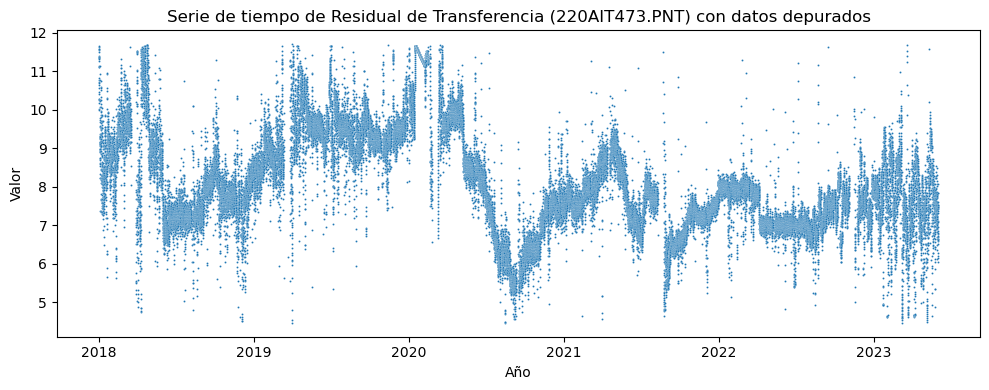

In [38]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.index, y=df[target_feature], s=2)
plt.title(f'Serie de tiempo de Residual de Transferencia (220AIT473.PNT) con datos depurados')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

#### Boxplot por año

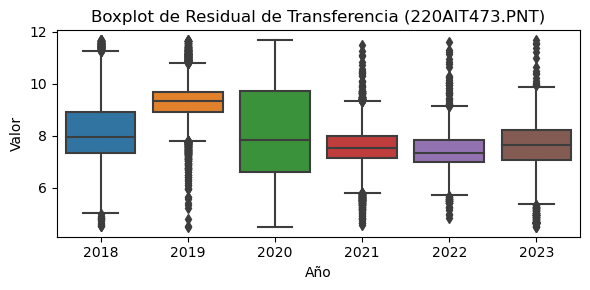

In [39]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='AÑO', y=target_feature, data=df)
plt.title(f'Boxplot de Residual de Transferencia (220AIT473.PNT)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

#### Histogramas por año

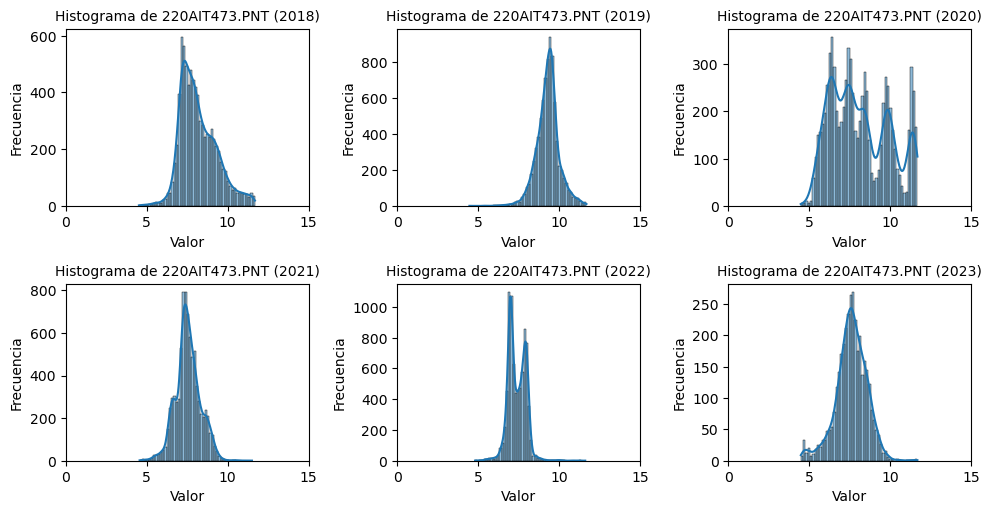

In [40]:
plt.figure(figsize=(10, 15))

años = list(range(2018, 2024))
num_subplots = len(años)

for i, año in enumerate(años):
    plt.subplot(num_subplots, 3, i + 1)
    sns.histplot(df[df['AÑO'] == año][target_feature], bins=50, kde=True)
    plt.title(f'Histograma de 220AIT473.PNT ({año})', fontsize=10)
    plt.xlim(0, 15)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Boxplot por mes

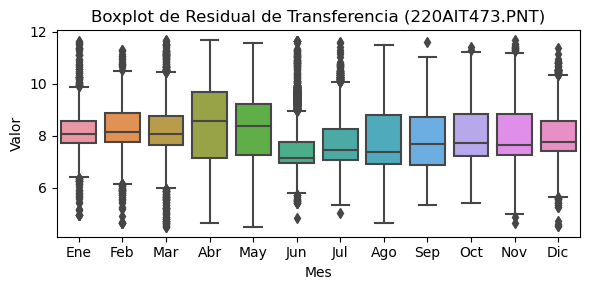

In [41]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='MES', y=target_feature, data=df[df['AÑO'] != 2020])
plt.title(f'Boxplot de Residual de Transferencia (220AIT473.PNT)')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

#### Histograma por mes

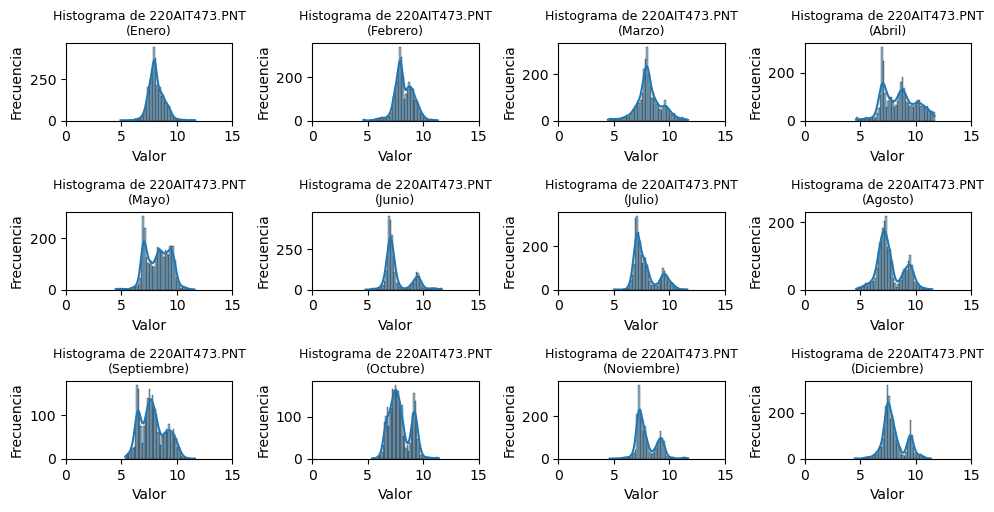

In [42]:
plt.figure(figsize=(10, 20))

meses_dict = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

meses = list(range(1, 13))
num_subplots = len(meses)

for i, mes in enumerate(meses):
    plt.subplot(num_subplots, 4, i + 1)
    sns.histplot(df[(df['AÑO'] != 2020) & (df['MES'] == mes)][target_feature], bins=50, kde=True)
    plt.title(f'Histograma de 220AIT473.PNT\n({meses_dict[mes]})', fontsize=9)
    plt.xlim(0, 15)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Histograma por periodo

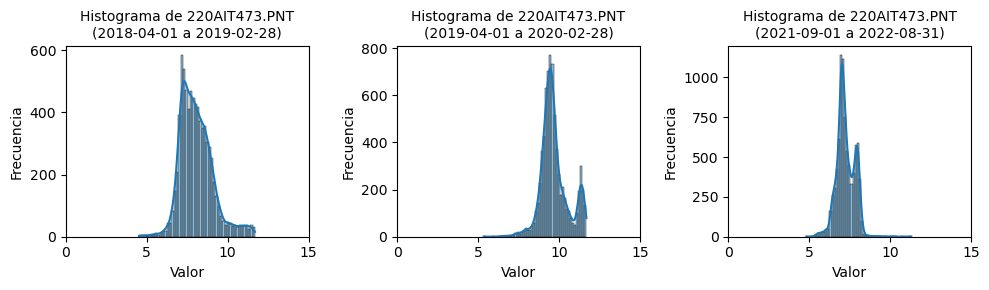

In [43]:
# Definir los períodos y sus fechas de inicio y fin
periodos = [
    {"fecha_inicio": "2018-04-01", "fecha_fin": "2019-02-28"},
    {"fecha_inicio": "2019-04-01", "fecha_fin": "2020-02-28"},
    {"fecha_inicio": "2021-09-01", "fecha_fin": "2022-08-31"}
]

# Crear el gráfico de histogramas para cada período
plt.figure(figsize=(10, 3))
for i, periodo in enumerate(periodos):
    fecha_inicio = periodo["fecha_inicio"]
    fecha_fin = periodo["fecha_fin"]
    
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[(df.index >= fecha_inicio) & (df.index <= fecha_fin)][target_feature], bins=50, kde=True)
    plt.title(f'Histograma de 220AIT473.PNT\n({fecha_inicio} a {fecha_fin})', fontsize=10)
    plt.xlim(0, 15)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Correlaciones

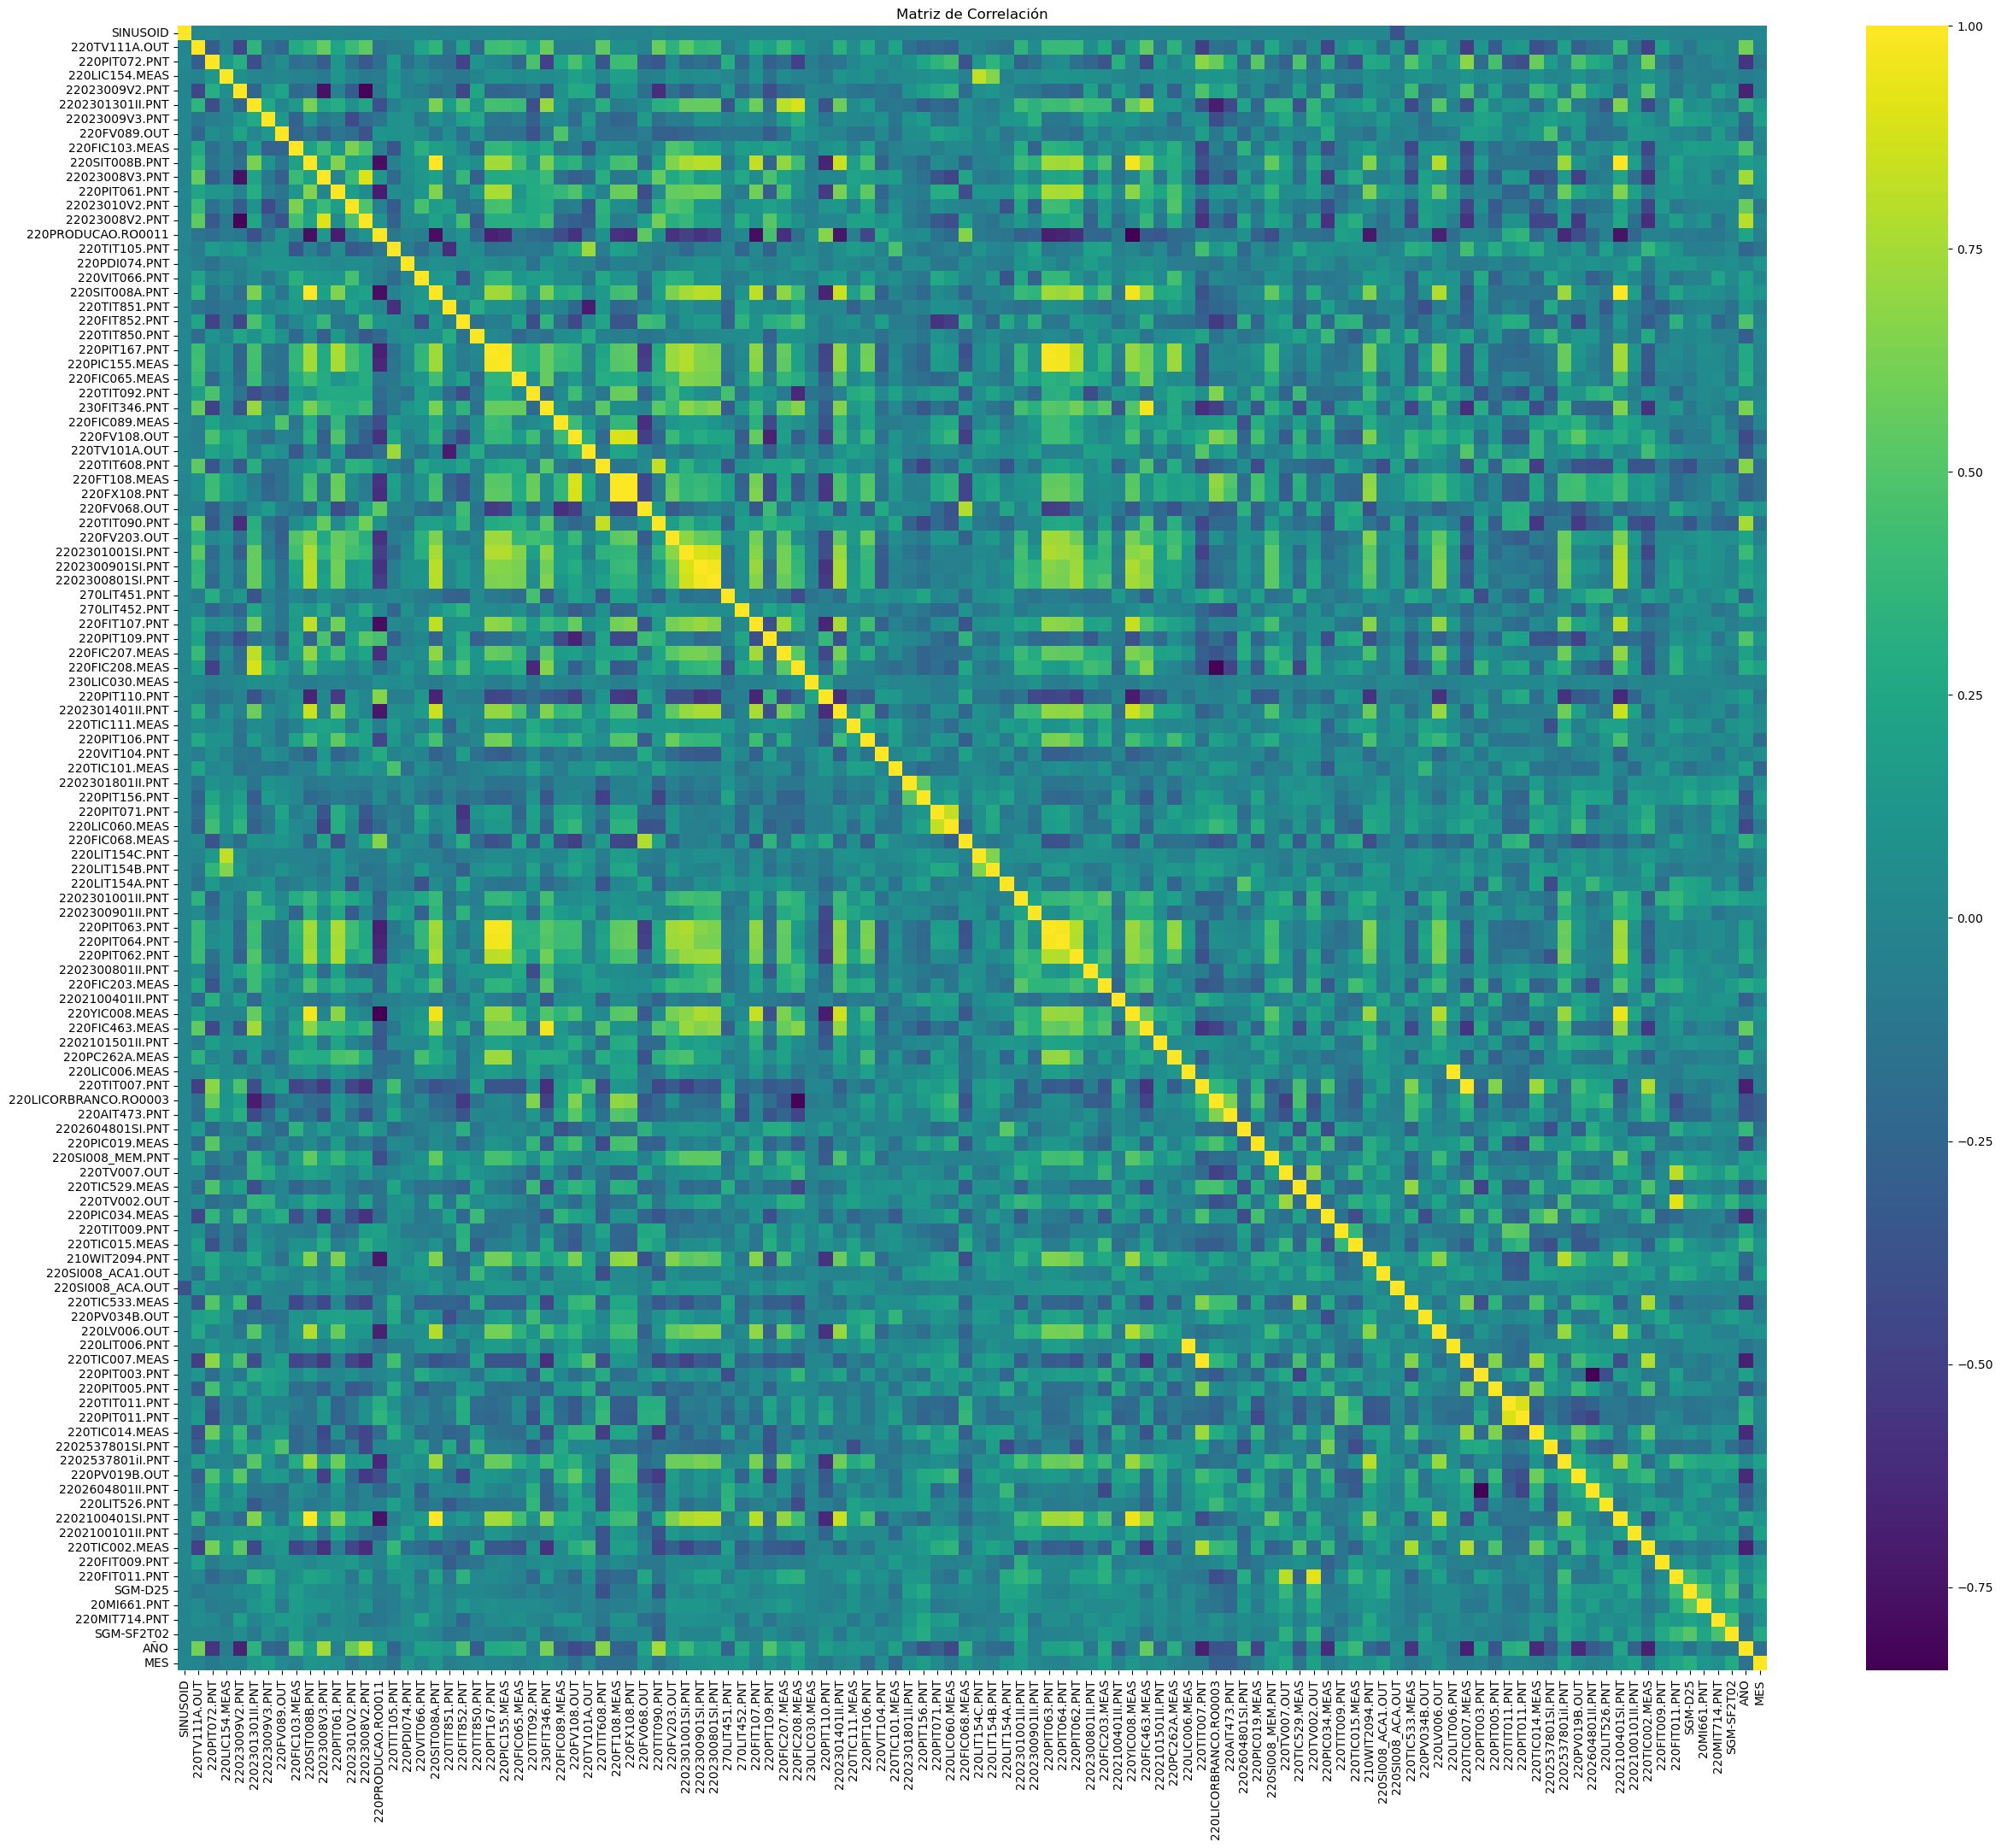

In [44]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis')
plt.title('Matriz de Correlación')
plt.show()

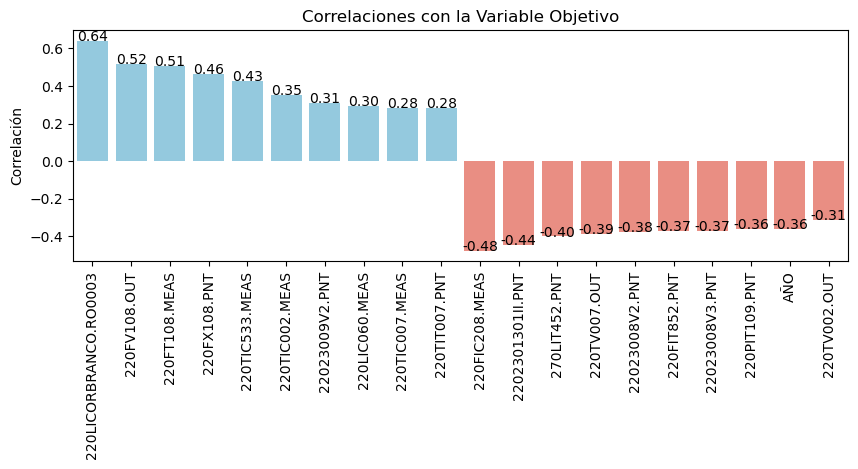

In [45]:
# Calcula las correlaciones entre las variables independientes y la variable objetivo
correlations = df.corrwith(df[target_feature])
correlations = correlations.drop(target_feature)

# Obtén las 10 mejores correlaciones positivas y las 10 mejores correlaciones negativas
top_positive_corr = correlations[correlations > 0].nlargest(10)
top_negative_corr = correlations[correlations < 0].nsmallest(10)

# Combina las correlaciones positivas y negativas en un solo DataFrame
top_correlations = pd.concat([top_positive_corr, top_negative_corr])

# Crea una figura con un solo eje horizontal
plt.figure(figsize=(10, 3))

# Crea el gráfico de barras con colores diferenciados para correlaciones positivas y negativas
colors = ['skyblue' if c > 0 else 'salmon' for c in top_correlations]
barplot = sns.barplot(x=top_correlations.index, y=top_correlations.values, orient='v', palette=colors)

# Configura el título y las etiquetas de los ejes
plt.title("Correlaciones con la Variable Objetivo")
plt.ylabel("Correlación")
plt.xticks(rotation=90)

# Anota cada barra con el valor de correlación
for i, v in enumerate(top_correlations):
    plt.text(i, v, f'{v:.2f}', ha='center', fontsize=10, color='black')

# Muestra el gráfico
plt.show()

In [46]:
top_correlations

220LICORBRANCO.RO0003    0.641288
220FV108.OUT             0.518806
220FT108.MEAS            0.507260
220FX108.PNT             0.463598
220TIC533.MEAS           0.428776
220TIC002.MEAS           0.351869
22023009V2.PNT           0.310802
220LIC060.MEAS           0.296096
220TIC007.MEAS           0.284822
220TIT007.PNT            0.284383
220FIC208.MEAS          -0.475989
2202301301II.PNT        -0.444873
270LIT452.PNT           -0.400070
220TV007.OUT            -0.385506
22023008V2.PNT          -0.377376
220FIT852.PNT           -0.372998
22023008V3.PNT          -0.369030
220PIT109.PNT           -0.361972
AÑO                     -0.361775
220TV002.OUT            -0.313677
dtype: float64

#### Correlación con humedad

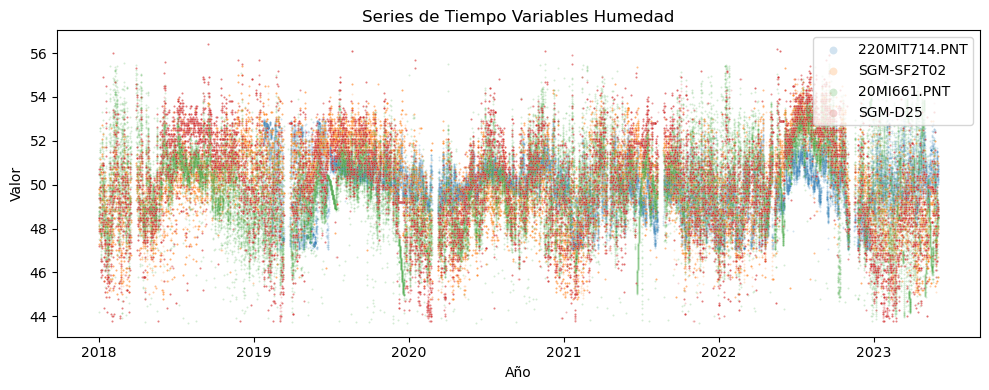

In [47]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.index, y=df['220MIT714.PNT'], s=2, label='220MIT714.PNT', alpha=0.2)
sns.scatterplot(x=df.index, y=df['SGM-SF2T02'], s=2, label='SGM-SF2T02', alpha=0.2)
sns.scatterplot(x=df.index, y=df['20MI661.PNT'], s=2, label= '20MI661.PNT', alpha=0.2)
sns.scatterplot(x=df.index, y=df['SGM-D25'], s=2, label='SGM-D25', alpha=0.2)
plt.title(f'Series de Tiempo Variables Humedad')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.tight_layout()
plt.legend(loc='upper right', markerscale=4)
plt.show()

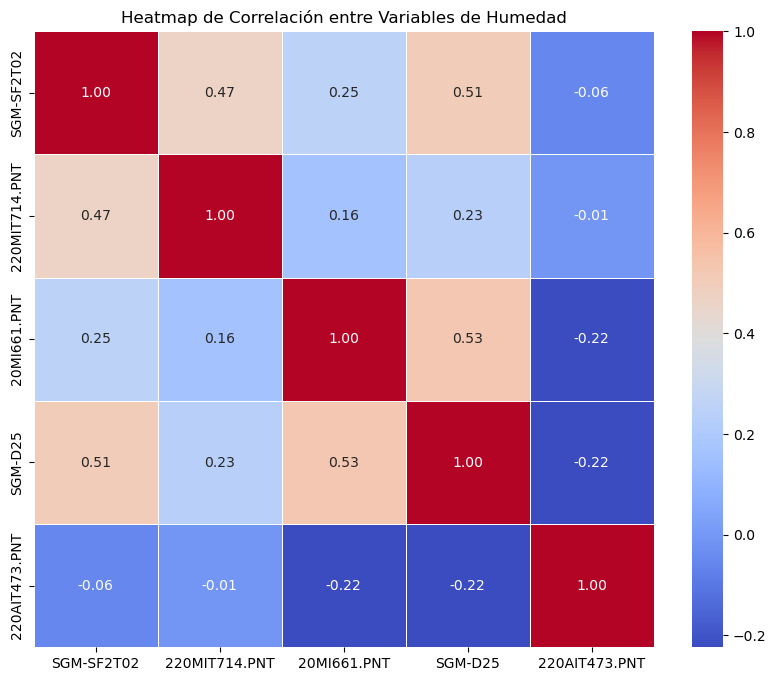

In [48]:
corr_df = df.corr()
correlacion= corr_df.loc[['SGM-SF2T02', '220MIT714.PNT', '20MI661.PNT', 'SGM-D25', '220AIT473.PNT'], ['SGM-SF2T02', '220MIT714.PNT', '20MI661.PNT', 'SGM-D25', '220AIT473.PNT']]
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlación entre Variables de Humedad')
plt.show()

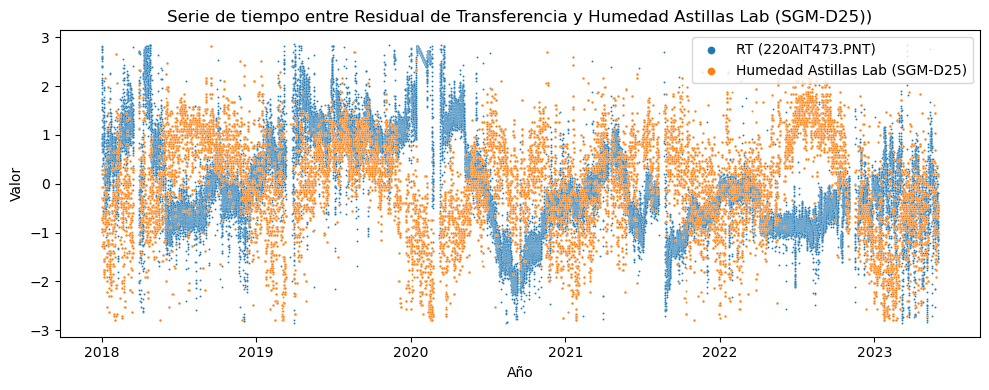

In [49]:
scaler = StandardScaler()
features_to_scale = [target_feature, 'SGM-D25']
df_scaled = scaler.fit_transform(df[features_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns=features_to_scale)


plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.index, y=df_scaled[target_feature], label='RT (220AIT473.PNT)', s=2)
sns.scatterplot(x=df.index, y=df_scaled['SGM-D25'], label='Humedad Astillas Lab (SGM-D25)', s=2)
plt.title('Serie de tiempo entre Residual de Transferencia y Humedad Astillas Lab (SGM-D25))')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend(loc='upper right', markerscale=4)
plt.tight_layout()
plt.show()

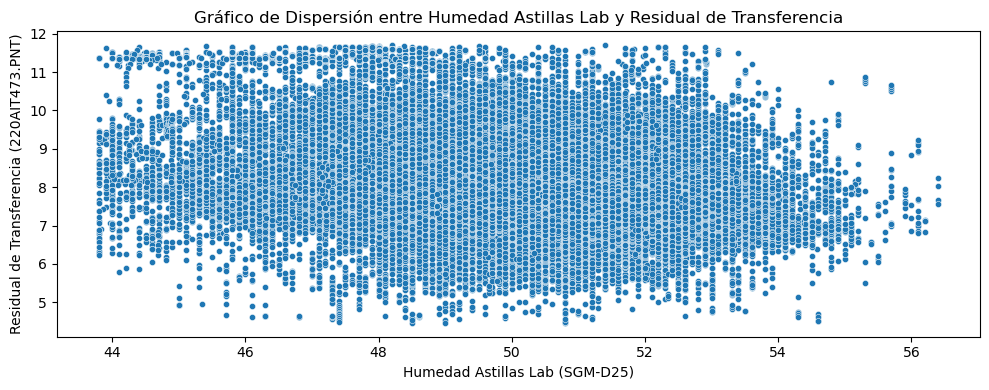

In [50]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df['SGM-D25'], y=df[target_feature], s=20)
plt.title('Gráfico de Dispersión entre Humedad Astillas Lab y Residual de Transferencia')
plt.xlabel('Humedad Astillas Lab (SGM-D25)')
plt.ylabel('Residual de Transferencia (220AIT473.PNT)')
plt.tight_layout()
plt.show()

Correlaciones: [-0.21919216286282237, -0.21124391315797683, -0.19760301637876967, -0.19878463043732758, -0.20174171966117443, -0.19827734893703428, -0.18882609992396684, -0.1842514706636626, -0.17619152117677644, -0.1576414083575197, -0.1624086510185245, -0.1730105007565443, -0.1788855726479628, -0.17075046938590327, -0.16989792653548275, -0.1735257608792598, -0.1792120736248117, -0.19418214423173336, -0.19400249633384886, -0.18735826358144433, -0.18547186326897344, -0.18534590876347068, -0.1858687331693278, -0.1842354248806948, -0.19490138245268232, -0.19070139264420033, -0.1820823145085158, -0.18158467476283705, -0.18072355098720574]
Mejor valor de día: 1


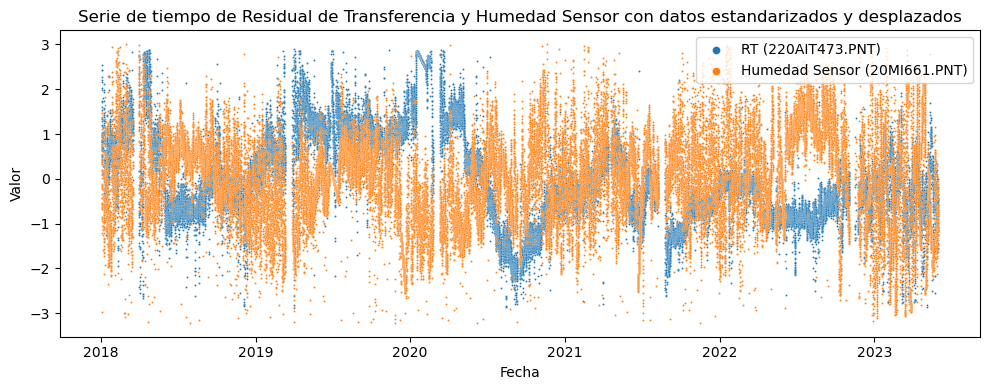

In [51]:
correlaciones = []
for i in range(1, 30):  
    indice_copia = df.index.copy()
    indice_copia = indice_copia + pd.DateOffset(days=i)  
    humedad_copia = df['20MI661.PNT'].copy() 
    humedad_copia.index = indice_copia
    df_humedad_copia = humedad_copia.to_frame()

    scaler = StandardScaler()
    df_combinado = df[[target_feature]].merge(df_humedad_copia[['20MI661.PNT']], left_index=True, right_index=True, how='outer')
    df_combinado = df_combinado.dropna()
    df_scaled = scaler.fit_transform(df_combinado)
    df_scaled = pd.DataFrame(df_scaled, columns=[target_feature,'20MI661.PNT'])

    correlacion = df_combinado.corr()[target_feature]['20MI661.PNT']
    correlaciones.append(correlacion)

mejor_dia = range(1, 30)[np.argmin(correlaciones)]
print("Correlaciones:", correlaciones)
print("Mejor valor de día:", mejor_dia)


indice_copia = df.index.copy()
indice_copia = indice_copia + pd.DateOffset(days=mejor_dia)
humedad_copia = df['20MI661.PNT'].copy()
humedad_copia.index = indice_copia
df_humedad_copia = humedad_copia.to_frame()

scaler = StandardScaler()
df_combinado = df[[target_feature]].merge(df_humedad_copia[['20MI661.PNT']], left_index=True, right_index=True, how='outer')
df_combinado = df_combinado.dropna()
df_scaled = scaler.fit_transform(df_combinado)
df_scaled = pd.DataFrame(df_scaled, columns=[target_feature,'20MI661.PNT'])

plt.figure(figsize=(10, 4))
sns.scatterplot(x=df_combinado.index, y=df_scaled[target_feature], label='RT (220AIT473.PNT)', s=2) 
sns.scatterplot(x=df_combinado.index, y=df_scaled['20MI661.PNT'], label='Humedad Sensor (20MI661.PNT)', s=2)  
plt.title('Serie de tiempo de Residual de Transferencia y Humedad Sensor con datos estandarizados y desplazados')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend(loc='upper right', markerscale=4)
plt.tight_layout()
plt.show()

#### Seleccion de caracteristicas mediante Boruta

In [52]:
df_boruta = pd.read_pickle('dataset_filtrado_boruta.csv')

In [53]:
print(set(df.columns)-set(df_boruta.columns))

{'SINUSOID', '220TIC101.MEAS', '220TIT009.PNT', 'SGM-SF2T02', '2202301801II.PNT', '220LIT154A.PNT', '22023009V2.PNT', 'MES', '220PDI074.PNT', '220LIC060.MEAS', '220FIC068.MEAS', '230FIT346.PNT', 'SGM-D25', '220LIC006.MEAS', '2202537801SI.PNT', '22023008V3.PNT', 'AÑO', '220TV002.OUT', '220SI008_ACA.OUT', '220LIT006.PNT', '2202101501II.PNT', '22023008V2.PNT'}


In [54]:
columnas_drop_boruta = list(set(df.columns)-set(df_boruta.columns))
df_drop_boruta = df.drop(columns = columnas_drop_boruta)
df = df_drop_boruta[df.columns[df.columns.isin(df_drop_boruta.columns)]]
df

220TV111A.OUT  220PIT072.PNT  220LIC154.MEAS  \
2018-01-01 00:00:00           95.0       0.014524        0.162538   
2018-01-01 01:00:00           95.0       0.003413       26.806496   
2018-01-01 02:00:00           95.0       0.003074       14.038163   
2018-01-01 03:00:00           95.0       0.003180        6.074811   
2018-01-01 04:00:00           65.0       0.003180        3.832892   
...                            ...            ...             ...   
2023-05-31 19:00:00          100.0       0.000527       13.487050   
2023-05-31 20:00:00          100.0       0.000176       17.678196   
2023-05-31 21:00:00          100.0       0.000000       17.781645   
2023-05-31 22:00:00          100.0       0.000000       40.442970   
2023-05-31 23:00:00          100.0       0.000000       11.903734   

                     2202301301II.PNT  22023009V3.PNT  220FV089.OUT  \
2018-01-01 00:00:00              68.0        1.728984          70.0   
2018-01-01 01:00:00              68.0        2.490404          70.0   
2018-01-01 02:00:00              68.0        2.647163          70.0   
2018-01-01 03:00:00              68.0        2.584136          70.0   
2018-01-01 04:00:00              68.0        1.944880          70.0   
...                               ...             ...           ...   
2023-05-31 19:00:00              71.0       -1.670000          70.0   
2023-05-31 20:00:00              71.0       -1.670000          70.0   
2023-05-31 21:00:00              71.0       -1.670000          70.0   
2023-05-31 22:00:00              71.0       -1.670000          70.0   
2023-05-31 23:00:00              71.0       -1.670000          70.0   

                     220FIC103.MEAS  220SIT008B.PNT  220PIT061.PNT  \
2018-01-01 00:00:00             NaN       38.012939       3.993443   
2018-01-01 01:00:00             NaN       37.868355       4.020220   
2018-01-01 02:00:00             NaN       38.367470       3.988515   
2018-01-01 03:00:00             NaN       39.135635       4.035613   
2018-01-01 04:00:00             NaN       38.771118       4.057813   
...                             ...             ...            ...   
2023-05-31 19:00:00        0.003315       39.787636       4.014003   
2023-05-31 20:00:00        0.003315       39.665485       4.014003   
2023-05-31 21:00:00        0.003315       39.698544       4.014003   
2023-05-31 22:00:00        0.003315       38.804073       4.014003   
2023-05-31 23:00:00        0.003315       39.762939       4.014003   

                     22023010V2.PNT  220PRODUCAO.RO0011  220TIT105.PNT  \
2018-01-01 00:00:00        0.533826            2.740553     101.214600   
2018-01-01 01:00:00        0.604638            2.786676     101.071777   
2018-01-01 02:00:00        0.554907            2.746373     101.008911   
2018-01-01 03:00:00        0.481609            2.885366     100.761719   
2018-01-01 04:00:00        0.534366            2.827063     100.771484   
...                             ...                 ...            ...   
2023-05-31 19:00:00        1.646701            3.316614     100.622559   
2023-05-31 20:00:00        1.646701            3.359353     100.706741   
2023-05-31 21:00:00        1.646701            3.339964     101.312096   
2023-05-31 22:00:00        1.646701            3.301809     101.437782   
2023-05-31 23:00:00        1.646701            3.335224     100.313484   

                     220VIT066.PNT  220SIT008A.PNT  220TIT851.PNT  \
2018-01-01 00:00:00       6.669499       38.033012            NaN   
2018-01-01 01:00:00       6.014058       37.955669            NaN   
2018-01-01 02:00:00       7.553591       38.401089            NaN   
2018-01-01 03:00:00       8.747852       39.085300            NaN   
2018-01-01 04:00:00      10.418903       38.772652            NaN   
...                            ...             ...            ...   
2023-05-31 19:00:00      24.128172       39.787636      62.916401   
2023-05-31 20:00:00      24.048855       39.665485      5

#### Imputación de datos

In [55]:
null_percentage = (df.isnull().sum() / len(df) * 100)
filtered_null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)
filtered_null_percentage

220MIT714.PNT       19.678550
2202604801SI.PNT    18.100897
220TIT851.PNT        9.399900
220FIT852.PNT        9.399900
220TIT850.PNT        9.365751
220PIT167.PNT        4.352775
220FIC103.MEAS       3.977143
220TIC015.MEAS       0.179848
220FV108.OUT         0.002277
220TIC014.MEAS       0.002277
dtype: float64

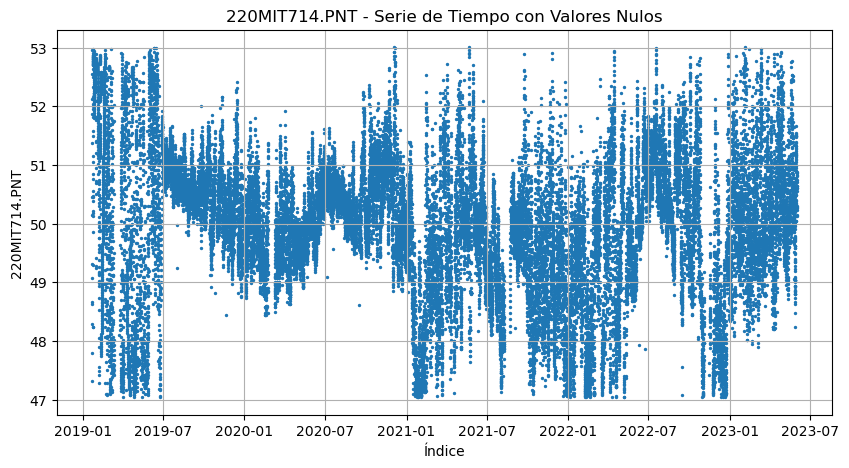

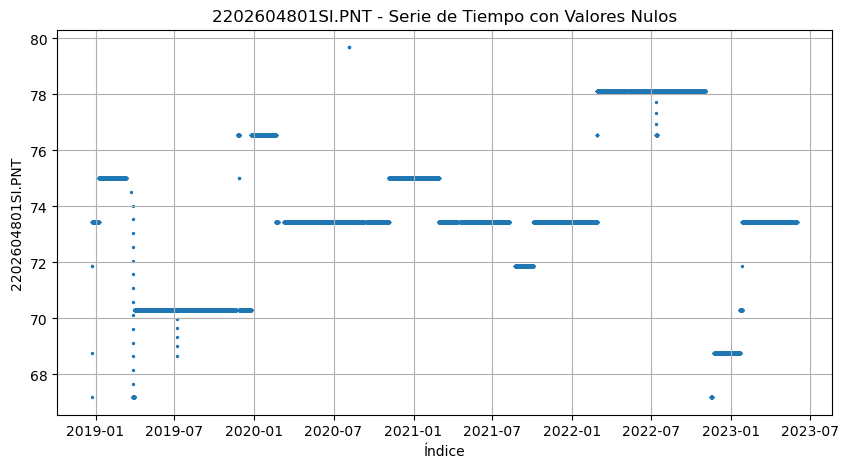

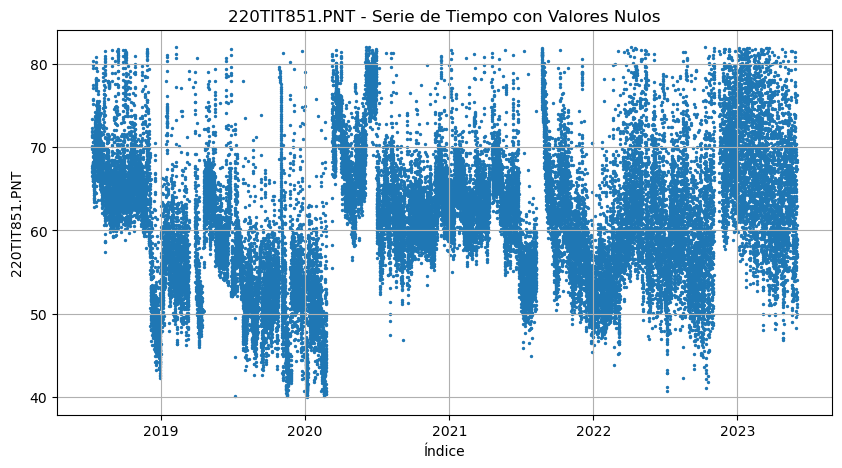

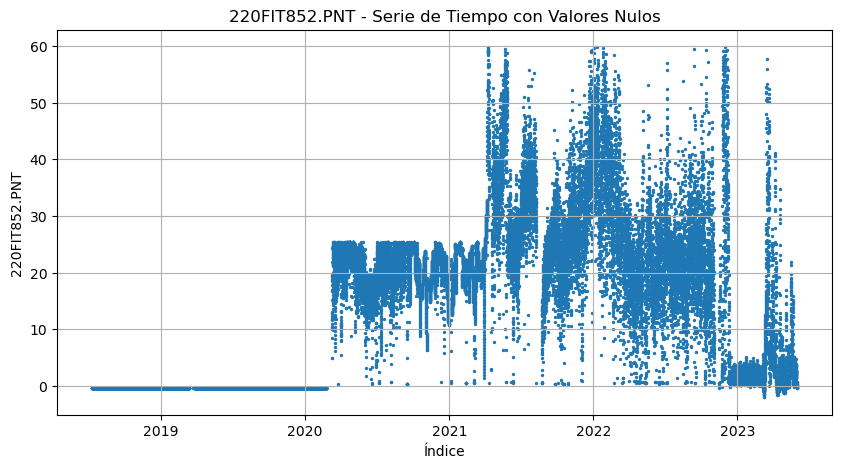

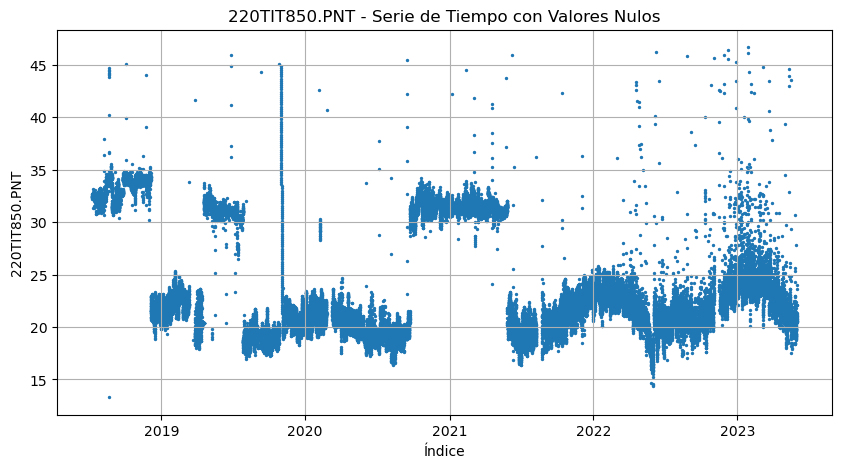

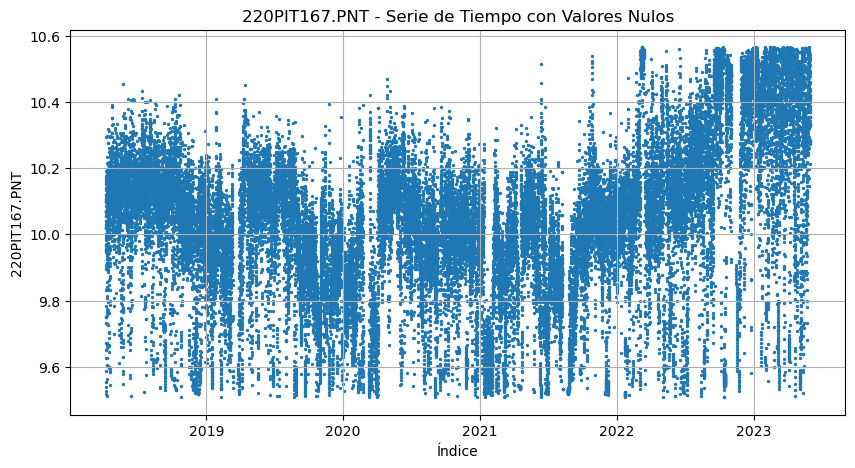

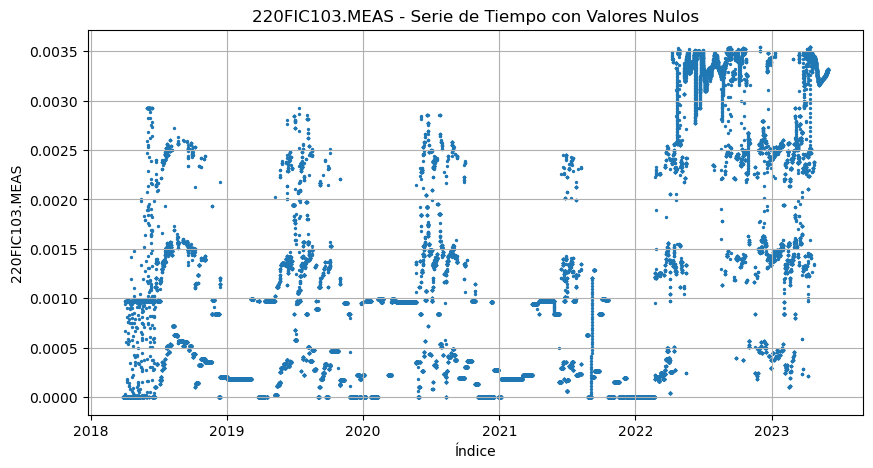

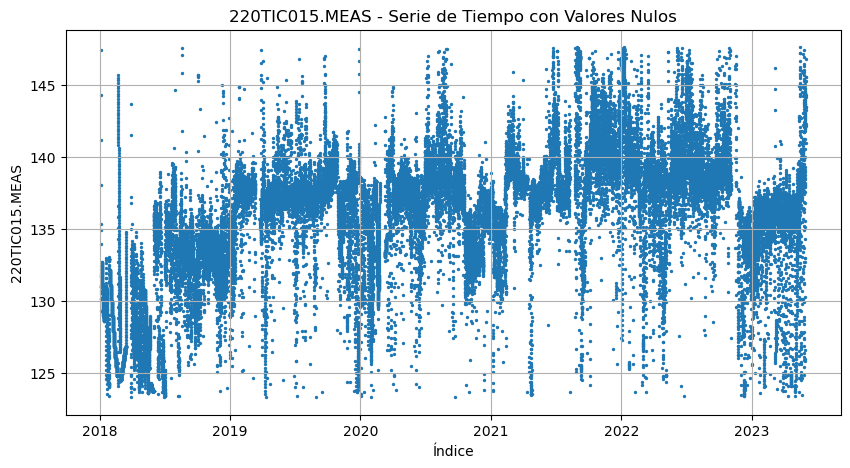

In [56]:
for column in filtered_null_percentage.iloc[:-2].index:
    plt.figure(figsize=(10, 5))
    plt.scatter(df.index, df[column], s=2)
    plt.title(f'{column} - Serie de Tiempo con Valores Nulos')
    plt.xlabel('Índice')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [57]:
#Imputar Nan
imputer = SimpleImputer(strategy='mean')
valores_nan = df.isnull().sum()
columnas_con_nan = valores_nan[valores_nan > 0].index
for columna in columnas_con_nan:
    df[columna] = imputer.fit_transform(df[[columna]])

In [58]:
#df.to_pickle('df_train.csv')

#### Filtro de tiempo

In [59]:
#fecha_inicio = pd.to_datetime('2019-04-01')
#fecha_fin = pd.to_datetime('2020-02-28')

In [60]:
#df = df[(df.index >= fecha_inicio) & (df.index <= fecha_fin)]

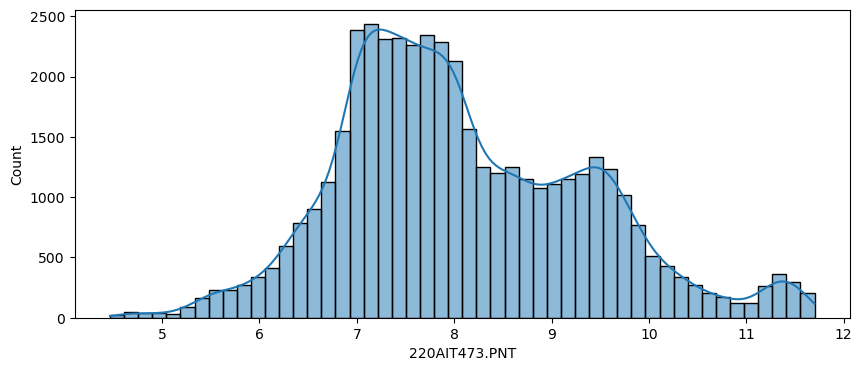

In [61]:
plt.figure(figsize=(10, 4))
sns.histplot(df[target_feature], bins=50, kde=True)
plt.show()

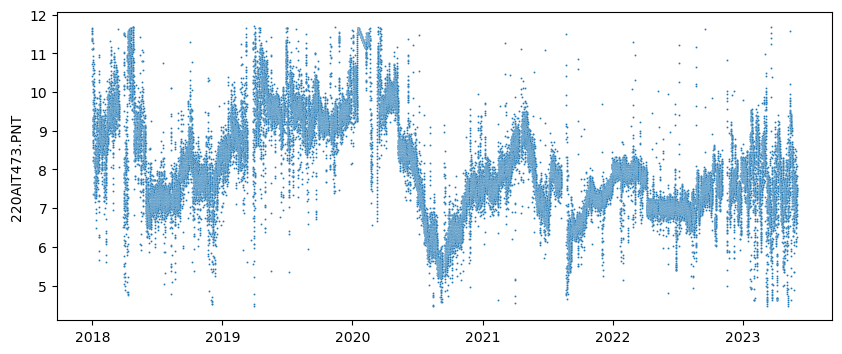

In [62]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.index, y=df[target_feature], s=2)
plt.show()

### Clustering

In [72]:
df = pd.read_pickle('df_train.csv')

In [73]:
#Eliminación de columnas
df = df.drop(columns=['220YIC008.MEAS', '220PRODUCAO.RO0011'])
df

220TV111A.OUT  220PIT072.PNT  220LIC154.MEAS  \
2018-01-01 00:00:00           95.0       0.014524        0.162538   
2018-01-01 01:00:00           95.0       0.003413       26.806496   
2018-01-01 02:00:00           95.0       0.003074       14.038163   
2018-01-01 03:00:00           95.0       0.003180        6.074811   
2018-01-01 04:00:00           65.0       0.003180        3.832892   
...                            ...            ...             ...   
2023-05-31 19:00:00          100.0       0.000527       13.487050   
2023-05-31 20:00:00          100.0       0.000176       17.678196   
2023-05-31 21:00:00          100.0       0.000000       17.781645   
2023-05-31 22:00:00          100.0       0.000000       40.442970   
2023-05-31 23:00:00          100.0       0.000000       11.903734   

                     2202301301II.PNT  22023009V3.PNT  220FV089.OUT  \
2018-01-01 00:00:00              68.0        1.728984          70.0   
2018-01-01 01:00:00              68.0        2.490404          70.0   
2018-01-01 02:00:00              68.0        2.647163          70.0   
2018-01-01 03:00:00              68.0        2.584136          70.0   
2018-01-01 04:00:00              68.0        1.944880          70.0   
...                               ...             ...           ...   
2023-05-31 19:00:00              71.0       -1.670000          70.0   
2023-05-31 20:00:00              71.0       -1.670000          70.0   
2023-05-31 21:00:00              71.0       -1.670000          70.0   
2023-05-31 22:00:00              71.0       -1.670000          70.0   
2023-05-31 23:00:00              71.0       -1.670000          70.0   

                     220FIC103.MEAS  220SIT008B.PNT  220PIT061.PNT  \
2018-01-01 00:00:00        0.001033       38.012939       3.993443   
2018-01-01 01:00:00        0.001033       37.868355       4.020220   
2018-01-01 02:00:00        0.001033       38.367470       3.988515   
2018-01-01 03:00:00        0.001033       39.135635       4.035613   
2018-01-01 04:00:00        0.001033       38.771118       4.057813   
...                             ...             ...            ...   
2023-05-31 19:00:00        0.003315       39.787636       4.014003   
2023-05-31 20:00:00        0.003315       39.665485       4.014003   
2023-05-31 21:00:00        0.003315       39.698544       4.014003   
2023-05-31 22:00:00        0.003315       38.804073       4.014003   
2023-05-31 23:00:00        0.003315       39.762939       4.014003   

                     22023010V2.PNT  220TIT105.PNT  220VIT066.PNT  \
2018-01-01 00:00:00        0.533826     101.214600       6.669499   
2018-01-01 01:00:00        0.604638     101.071777       6.014058   
2018-01-01 02:00:00        0.554907     101.008911       7.553591   
2018-01-01 03:00:00        0.481609     100.761719       8.747852   
2018-01-01 04:00:00        0.534366     100.771484      10.418903   
...                             ...            ...            ...   
2023-05-31 19:00:00        1.646701     100.622559      24.128172   
2023-05-31 20:00:00        1.646701     100.706741      24.048855   
2023-05-31 21:00:00        1.646701     101.312096      24.081966   
2023-05-31 22:00:00        1.646701     101.437782      23.860558   
2023-05-31 23:00:00        1.646701     100.313484      23.019876   

                     220SIT008A.PNT  220TIT851.PNT  220FIT852.PNT  \
2018-01-01 00:00:00       38.033012      61.280993      13.999144   
2018-01-01 01:00:00       37.955669      61.280993      13.999144   
2018-01-01 02:00:00       38.401089      61.280993      13.999144   
2018-01-01 03:00:00       39.085300      61.280993      13.999144   
2018-01-01 04:00:00       38.772652      61.280993      13.999144   
...                             ...            ...            ...   
2023-05-31 19:00:00       39.787636      62.916401      -0.356177   
2023-05-31 20:00:00       39.665485      56.829773      -0.436828   
2023-05-31 21:00:00       39.698544      54.0816

#### KMEANS - Metodo del Codo y Silhouette Sin PCA

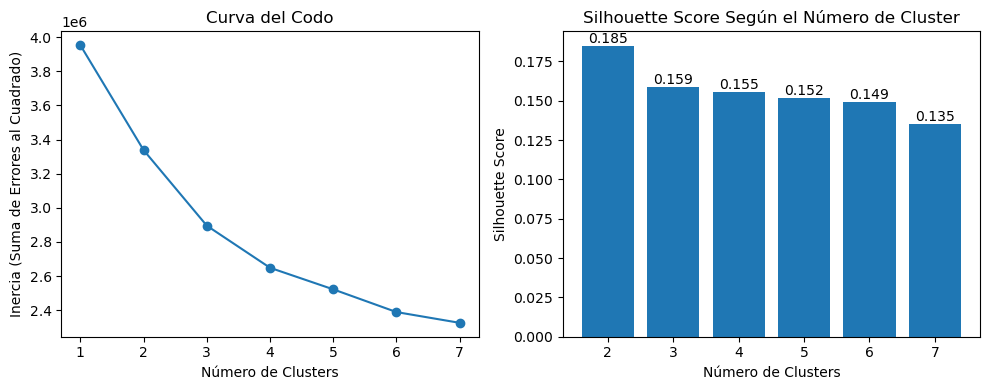

In [74]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(X_scaled)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia (Suma de Errores al Cuadrado)")
plt.xticks(range(1, 8))
plt.title("Curva del Codo")

plt.subplot(1, 2, 2)
silhouette_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(silhouette)

plt.bar(range(2, 8), silhouette_scores)
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 8))
plt.title("Silhouette Score Según el Número de Cluster")
for i, score in enumerate(silhouette_scores):
    plt.text(i + 2, score, f'{score:.3f}', ha='center', va='bottom')
plt.tight_layout()    
plt.show()

#### PCA

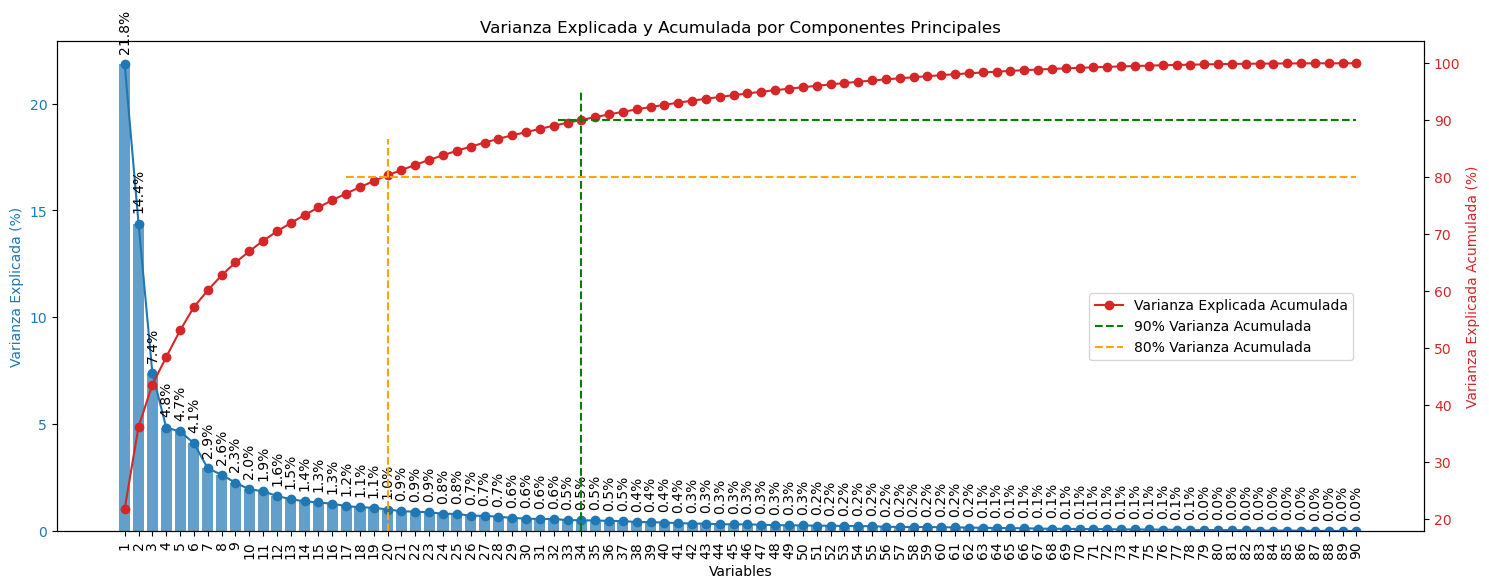

Número mínimo de componentes necesarios para explicar al menos el 90% de la varianza explicada acumulada: 34

Valores propios (explained variance): [1.96564422e+01 1.29486103e+01 6.65319284e+00 4.35435515e+00
 4.19331294e+00 3.69611717e+00 2.64175209e+00 2.36782177e+00
 2.03281898e+00 1.75813521e+00 1.67165292e+00 1.47434205e+00
 1.33764321e+00 1.25071763e+00 1.20341340e+00 1.14682214e+00
 1.04934986e+00 9.96079344e-01 9.78718455e-01 9.02717968e-01
 8.35007239e-01 8.09115001e-01 7.89079450e-01 7.24896067e-01
 7.20278579e-01 6.43312260e-01 6.37905388e-01 5.98828221e-01
 5.52820647e-01 5.17151393e-01 5.07353057e-01 4.99607405e-01
 4.61221056e-01 4.48183882e-01 4.42771023e-01 4.24660840e-01
 4.18523274e-01 3.76849454e-01 3.73958245e-01 3.51604368e-01
 3.35036526e-01 3.11897618e-01 3.06901825e-01 2.82945420e-01
 2.81179794e-01 2.76379095e-01 2.63879873e-01 2.44345298e-01
 2.38454651e-01 2.33121627e-01 2.24767883e-01 2.20403542e-01
 2.12298115e-01 2.04299117e-01 2.00463669e-01 1.78685828e-0

In [75]:
X = df.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = len(X.columns) 
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


fig, ax1 = plt.subplots(figsize=(15, 6))
color = 'tab:blue'
ax1.set_xlabel('Variables')
ax1.set_ylabel('Varianza Explicada (%)', color=color)
ax1.bar(range(1, n_components + 1), explained_variance_ratio * 100, color=color, alpha=0.7, label='Varianza Explicada')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, n_components + 1))


for i, txt in enumerate(explained_variance_ratio):
    ax1.annotate(f'{100*txt:.1f}%', (i+1, explained_variance_ratio[i]*100), textcoords="offset points", xytext=(0,10), ha='center', rotation=90)
ax1.plot(range(1, n_components + 1), explained_variance_ratio * 100, marker='o', linestyle='-', color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Varianza Explicada Acumulada (%)', color=color)
ax2.plot(range(1, n_components + 1), cumulative_explained_variance * 100, marker='o', linestyle='-', color=color, label='Varianza Explicada Acumulada')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axvline(x=np.argmax(cumulative_explained_variance >= 0.9)+1, color='green', linestyle='--', label='90% Varianza Acumulada',  ymax=0.9)
ax2.axvline(x=np.argmax(cumulative_explained_variance >= 0.8)+1, color='orange', linestyle='--', label='80% Varianza Acumulada', ymax=0.8)
ax2.axhline(y=90, xmin=np.argmax(cumulative_explained_variance >= 0.9) / n_components, xmax=0.95, color='green', linestyle='--')
ax2.axhline(y=80, xmin=np.argmax(cumulative_explained_variance >= 0.8) / n_components, xmax=0.95, color='orange', linestyle='--')
ax1.set_xticklabels(ax1.get_xticks(), rotation=90)
ax1.grid(False)
ax2.grid(False)
plt.title('Varianza Explicada y Acumulada por Componentes Principales')
ax2.legend(loc='upper left', bbox_to_anchor=(0.75, 0.5))
fig.tight_layout()
plt.show()

n_components_needed = np.argmax(cumulative_explained_variance >= 0.9) + 1
print("Número mínimo de componentes necesarios para explicar al menos el 90% de la varianza explicada acumulada:", n_components_needed)
print()
print("Valores propios (explained variance):", pca.explained_variance_)
print()
print("Número de valores propios mayores que 1:", np.sum(pca.explained_variance_ >= 1))

In [76]:
X = df.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = n_components_needed  
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

#### K-MEANS - Metodo del Codo y Silhouette Con PCA

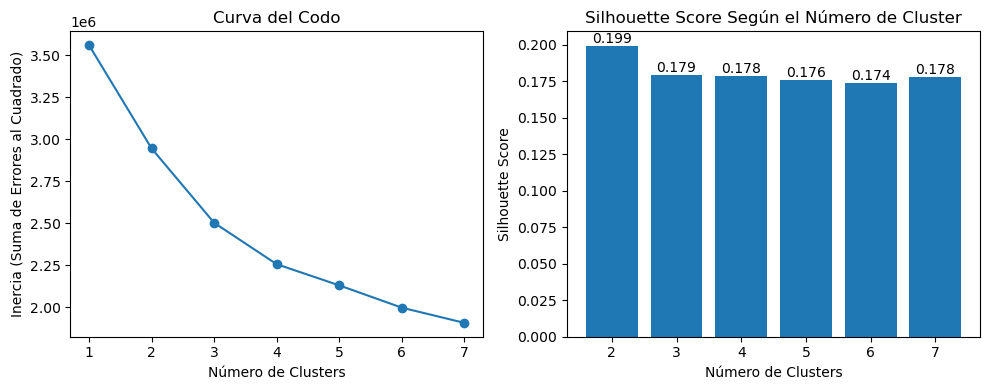

In [77]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(X_pca)
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia (Suma de Errores al Cuadrado)")
plt.xticks(range(1, 8))
plt.title("Curva del Codo")

plt.subplot(1, 2, 2)
silhouette_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    clusters = kmeans.fit_predict(X_pca)
    silhouette = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(silhouette)

plt.bar(range(2, 8), silhouette_scores)
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 8))
plt.title("Silhouette Score Según el Número de Cluster")
for i, score in enumerate(silhouette_scores):
    plt.text(i + 2, score, f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()    
plt.show()

Silhouette score for n_clusters=2: 0.19920791272785246
Silhouette score for n_clusters=3: 0.17917522637631508
Silhouette score for n_clusters=4: 0.17823843794542985


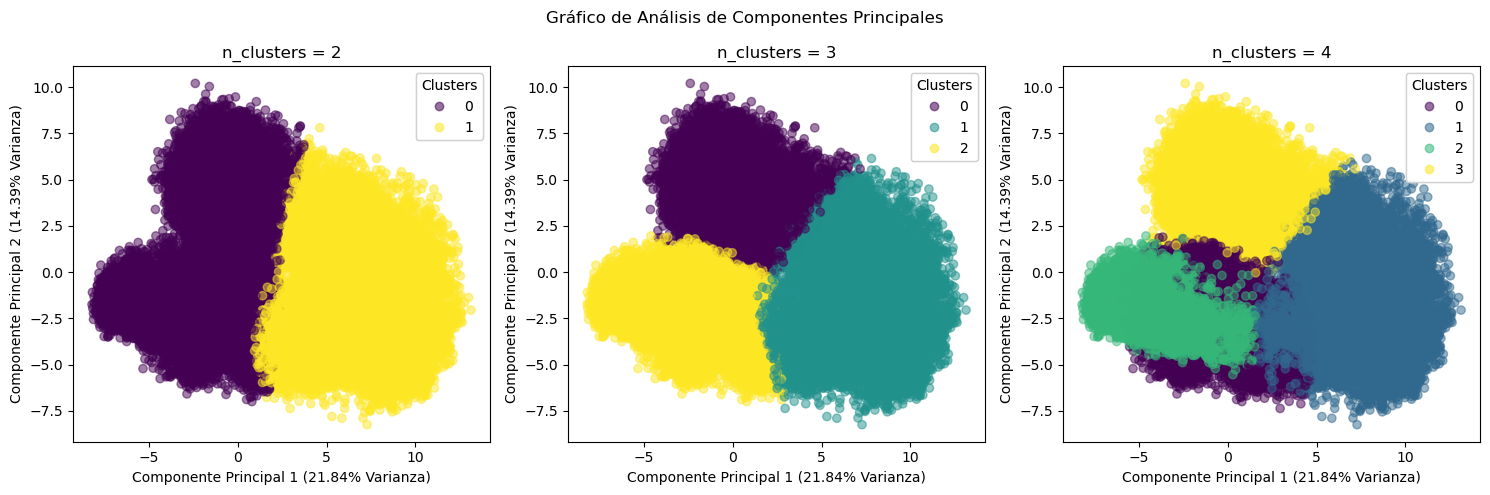

In [78]:
n_clusters_list = [2, 3, 4]
PCA_df = pd.DataFrame(data=X_pca, columns=[f'Componente Principal {i}' for i in range(1, pca.n_components_ + 1)])
PCA_df.index = df.index


fig, axes = plt.subplots(1, len(n_clusters_list), figsize=(15, 5))

for i, n_clusters in enumerate(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    clusters = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')
    print(f"Silhouette score for n_clusters={n_clusters}: {silhouette_avg}")

    PCA_df[f'Cluster_{n_clusters}'] = clusters
    scatter = axes[i].scatter(PCA_df[PCA_df.columns[0]], PCA_df[PCA_df.columns[1]], c=clusters, cmap='viridis', alpha=0.5)
    axes[i].set_title(f'n_clusters = {n_clusters}')
    axes[i].set_xlabel(f'Componente Principal 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}% Varianza)')
    axes[i].set_ylabel(f'Componente Principal 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}% Varianza)')
    legend = axes[i].legend(*scatter.legend_elements(), title='Clusters', loc='upper right')
    axes[i].add_artist(legend)

fig.suptitle("Gráfico de Análisis de Componentes Principales")
plt.tight_layout()
plt.show()

#### DBSCAN - Metodo de la rodilla y Silhouette con PCA

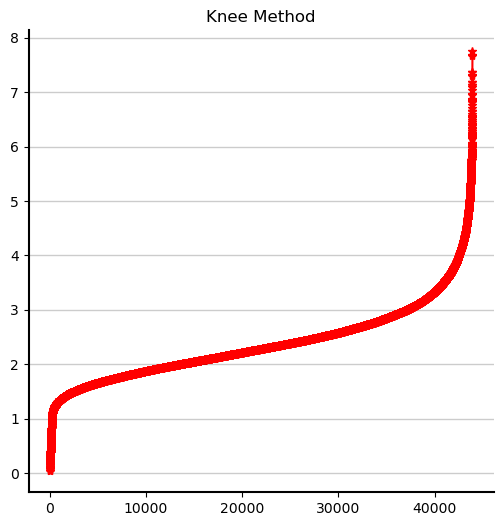

In [79]:
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

distances = np.sort(distances, axis = 0)
distances = distances[:,1]

fig, ax = plt.subplots(figsize = (6,6))
plt.plot(distances, "r-*")
#plt.axhline(y = 2, color = "blue")
plt.title("Knee Method")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [80]:
eps_values = np.arange(1,7.1,0.50)
min_samples = np.arange(10,51,5)

from itertools import product
dbscan_paramns = list(product(eps_values, min_samples))
n_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(X_pca)
    try:
        sil_score.append(silhouette_score(X_pca, y_dbscan))
    except:
        sil_score.append(0)
    n_of_clusters.append(len(np.unique(y_dbscan)))

data_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ["Eps", "Min_samples"])
data_paramns_tunning["sil_score"] = sil_score
data_paramns_tunning["n_clusters"] = n_of_clusters

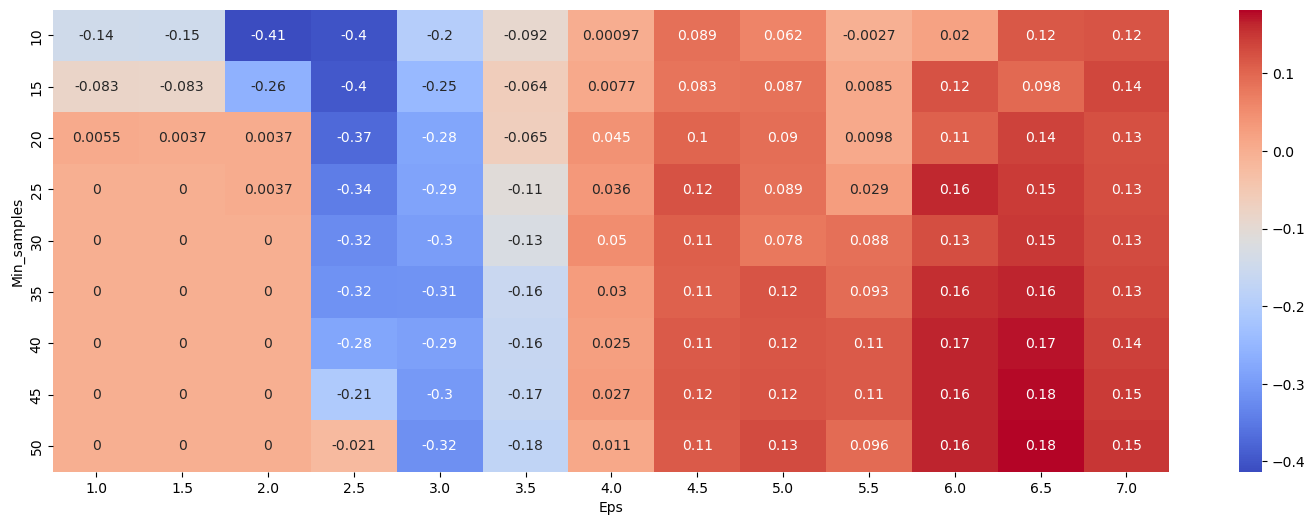

In [81]:
pivot_1 = pd.pivot_table(data_paramns_tunning, values = "sil_score", columns = "Eps", index = "Min_samples")
fig, ax = plt.subplots(figsize = (18,6))
sns.heatmap(pivot_1, annot = True, annot_kws = {"size":10}, cmap = "coolwarm", ax = ax)
plt.show()

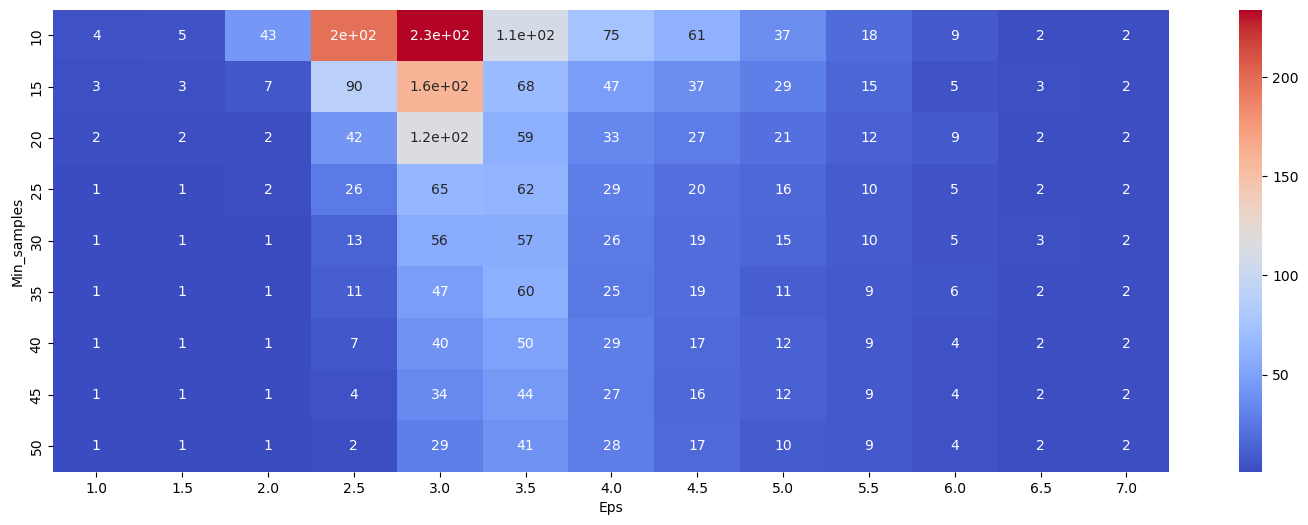

In [82]:
pivot_2 = pd.pivot_table(data_paramns_tunning, values = "n_clusters", columns = "Eps", index = "Min_samples")
fig, ax = plt.subplots(figsize = (18,6))
sns.heatmap(pivot_2, annot = True, annot_kws = {"size":10}, cmap = "coolwarm", ax = ax)
plt.show()

0.17814816721772217


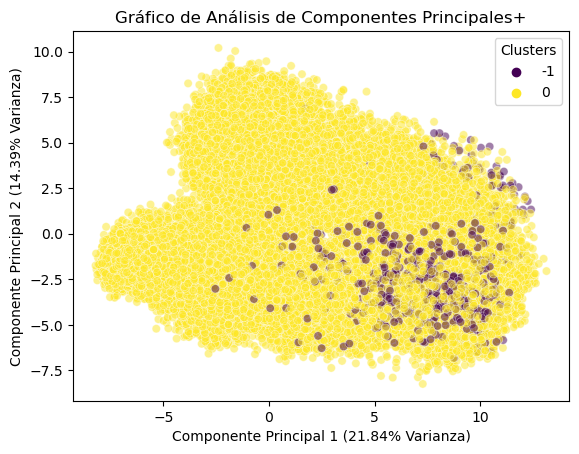

In [83]:
dbscan_train = DBSCAN(eps = 6.5, min_samples = 45)
y_dbscan = dbscan_train.fit_predict(X_pca)
print(silhouette_score(X_pca, y_dbscan))


PCA_df = pd.DataFrame(data=X_pca, columns=[f'Componente Principal {i}' for i in range(1, pca.n_components_ + 1)])
PCA_df.index = df.index
PCA_df["DBSCAN_PCA"] = y_dbscan


scatter = sns.scatterplot(x=PCA_df.iloc[:, 0], y=PCA_df.iloc[:, 1], hue=y_dbscan, palette='viridis', alpha=0.5)
plt.xlabel(f'Componente Principal 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}% Varianza)')
plt.ylabel(f'Componente Principal 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}% Varianza)')
plt.title('Gráfico de Análisis de Componentes Principales+')
plt.legend(title='Clusters', loc='upper right')

plt.show()

#### Clustering Aglomerativo - Dendograma y Silhouette con PCA

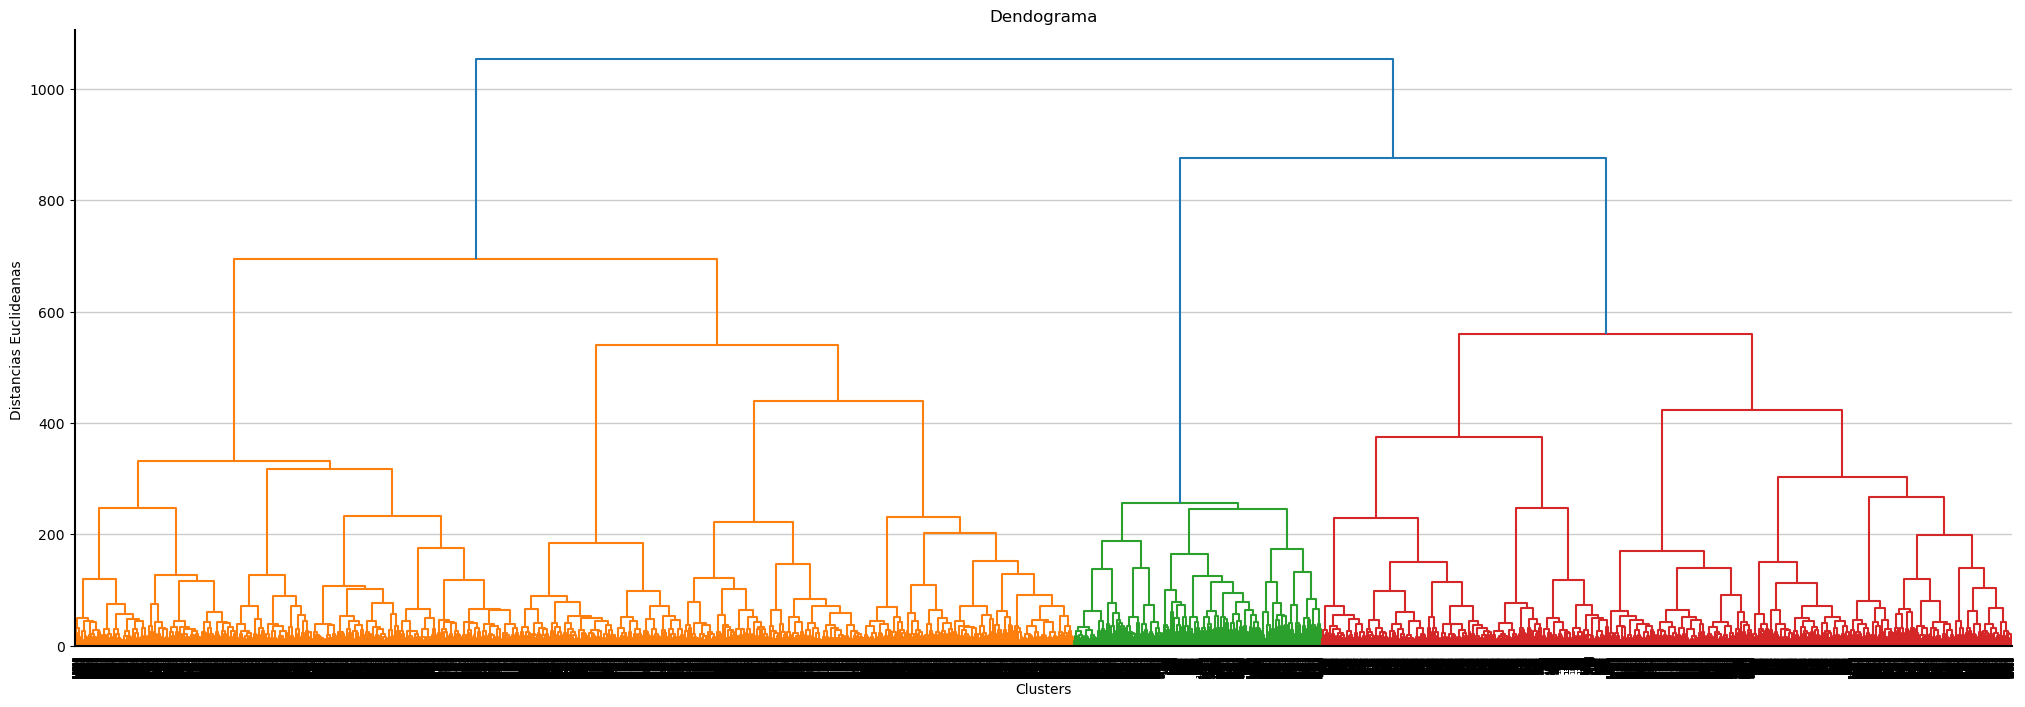

In [84]:
fig, ax = plt.subplots(figsize = (25,8))
dendrogram(linkage(X_pca, method = "ward"))
plt.title("Dendograma")
plt.xlabel("Clusters")
plt.ylabel("Distancias Euclideanas ")
plt.xticks(rotation=90)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

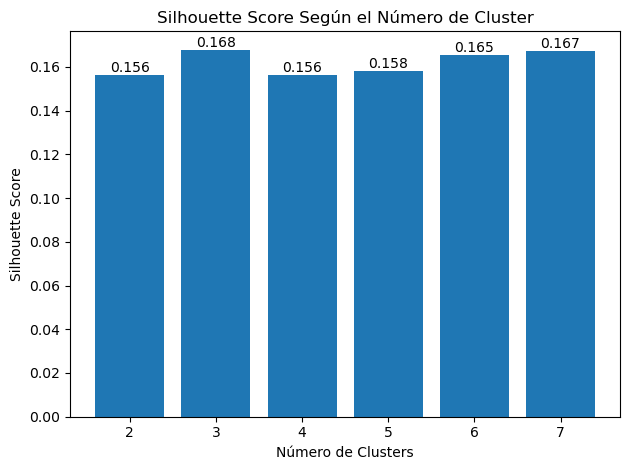

In [85]:
silhouette_scores = []
for k in range(2, 8):
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    y_hc = hc.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, y_hc)
    silhouette_scores.append(silhouette_avg)

plt.bar(range(2, 8), silhouette_scores)
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 8))
plt.title("Silhouette Score Según el Número de Cluster")
for i, score in enumerate(silhouette_scores):
    plt.text(i + 2, score, f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()    
plt.show()

Silhouette score for n_clusters=2: 0.15632504346137546
Silhouette score for n_clusters=3: 0.1678813095475792
Silhouette score for n_clusters=4: 0.15608398485682606


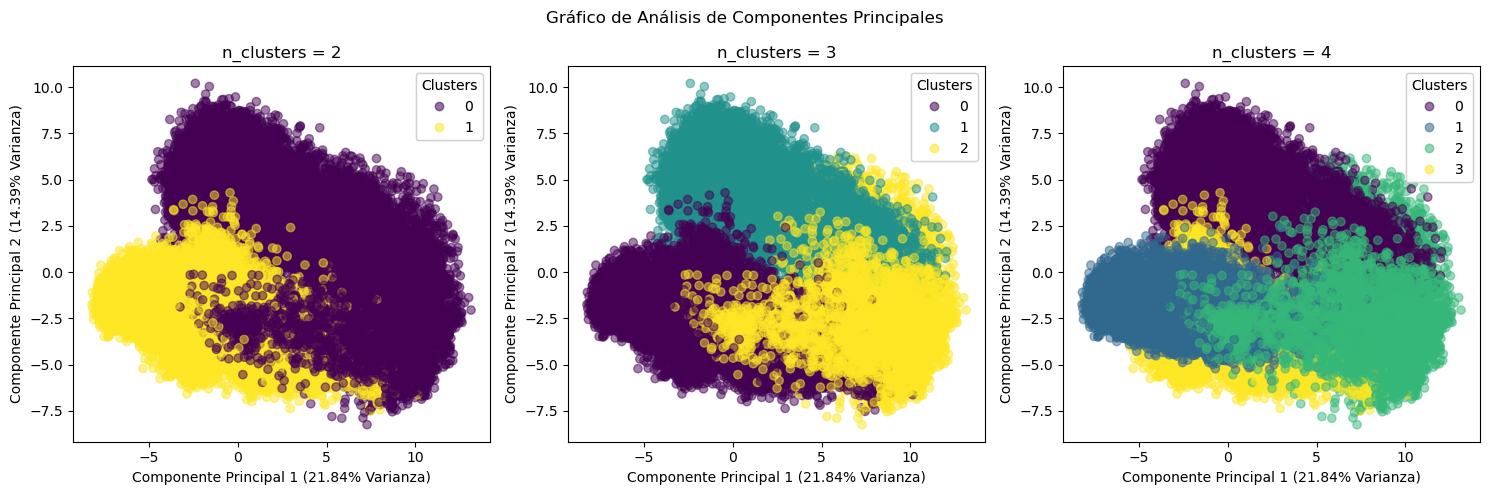

In [86]:
n_clusters_list = [2, 3, 4]

PCA_df = pd.DataFrame(data=X_pca, columns=[f'Componente Principal {i}' for i in range(1, pca.n_components_ + 1)])
PCA_df.index = df.index


fig, axes = plt.subplots(1, len(n_clusters_list), figsize=(15, 5))
for i, n_clusters in enumerate(n_clusters_list):
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    y_hc = hc.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, y_hc, metric='euclidean')
    print(f"Silhouette score for n_clusters={n_clusters}: {silhouette_avg}")
    
    PCA_df[f'Cluster_{n_clusters}'] = y_hc
    scatter = axes[i].scatter(PCA_df[PCA_df.columns[0]], PCA_df[PCA_df.columns[1]], c=y_hc, cmap='viridis', alpha=0.5)
    axes[i].set_title(f'n_clusters = {n_clusters}')
    axes[i].set_xlabel(f'Componente Principal 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}% Varianza)')
    axes[i].set_ylabel(f'Componente Principal 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}% Varianza)')
    legend = axes[i].legend(*scatter.legend_elements(), title='Clusters', loc='upper right')
    axes[i].add_artist(legend)

fig.suptitle("Gráfico de Análisis de Componentes Principales")
plt.tight_layout()
plt.show()

#### Grafico de Silhouette en algoritmo de clustering

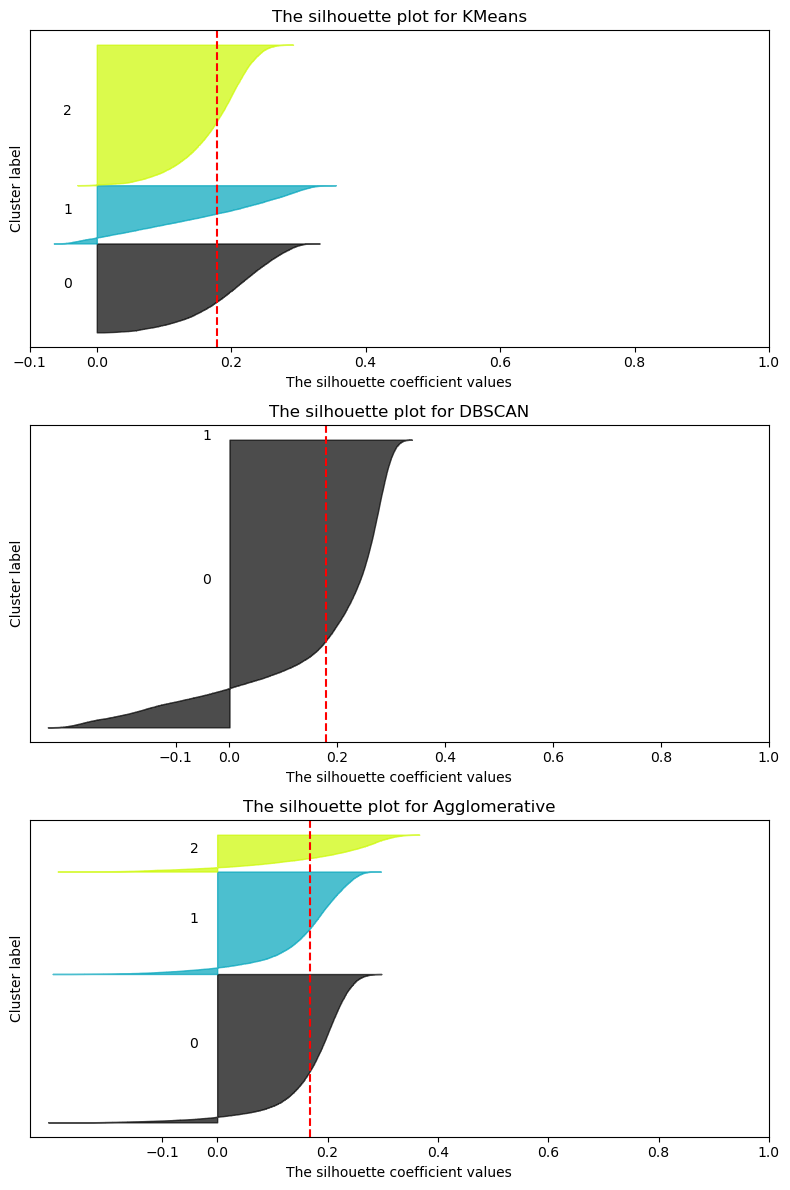

In [87]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
dbscan = DBSCAN(eps=6.5, min_samples=45)
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')


fig, axes = plt.subplots(3, 1, figsize=(8, 12))
models = [(kmeans, 'KMeans'), (dbscan, 'DBSCAN'), (agglo, 'Agglomerative')]


for i, (model, name) in enumerate(models):
    cluster_labels = model.fit_predict(X_pca)
    if name == 'DBSCAN':
        n_clusters = len(set(cluster_labels))
    else:
        n_clusters = model.n_clusters
    
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)
    
    y_lower = 10
    for j in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        axes[i].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        axes[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        y_lower = y_upper + 10  # 10 for the 0 samples

    axes[i].set_title(f"The silhouette plot for {name}")
    axes[i].set_xlabel("The silhouette coefficient values")
    axes[i].set_ylabel("Cluster label")
    axes[i].axvline(x=silhouette_avg, color="red", linestyle="--")
    axes[i].set_yticks([]) 
    axes[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])   

plt.tight_layout()
plt.show()

#### Conteno de cluster (KMEANS + PCA) 

In [88]:
df = pd.read_pickle('df_train.csv')

#Eliminación de columnas
df = df.drop(columns=['220YIC008.MEAS', '220PRODUCAO.RO0011'])

#Filtro temporal
#df = df.loc['2018-04-01':'2019-02-28']
#df = df.loc['2019-04-01':'2020-02-28']
df = df.loc['2021-09-01':'2022-08-31']

#Filtro outliers
for column in df.columns:
    df.loc[:, column] = replace_outliers_with_nan(df[column])
df.interpolate(method='linear', inplace=True)

#Imputación de datos
imputer = SimpleImputer(strategy='mean')
valores_nan = df.isnull().sum()
columnas_con_nan = valores_nan[valores_nan > 0].index
for columna in columnas_con_nan:
    df[columna] = imputer.fit_transform(df[[columna]])

#PCA
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 0.9
pca = PCA(n_components)
X_pca = pca.fit_transform(X_scaled)

# Lista de valores para n_clusters
n_clusters_list = [2, 3, 4]

# Crear un DataFrame general
PCA_df = pd.DataFrame(data=X_pca, columns=[f'Componente Principal {i}' for i in range(1, pca.n_components_ + 1)])
PCA_df.index = df.index

for i, n_clusters in enumerate(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    clusters = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')
    print(f"Silhouette score for n_clusters={n_clusters}: {silhouette_avg:.3f}")
    

    PCA_df[f'Cluster_{n_clusters}'] = clusters

clusters = ['Cluster_2', 'Cluster_3', 'Cluster_4']
cluster_size = pd.DataFrame()
for cluster in clusters:
    sizes = PCA_df.groupby(cluster).size().reset_index(name=f'size_{cluster}')
    cluster_size = cluster_size.join(pd.DataFrame(index=sizes[cluster], data={f'size_{cluster}': sizes[f'size_{cluster}']}), how='outer')
cluster_size = cluster_size.fillna(0)
cluster_size

Silhouette score for n_clusters=2: 0.168
Silhouette score for n_clusters=3: 0.194
Silhouette score for n_clusters=4: 0.175


size_Cluster_2  size_Cluster_3  size_Cluster_4
0          4626.0          3916.0            1748
1          3815.0          3102.0            3072
2             0.0          1423.0            2358
3             0.0             0.0            1263

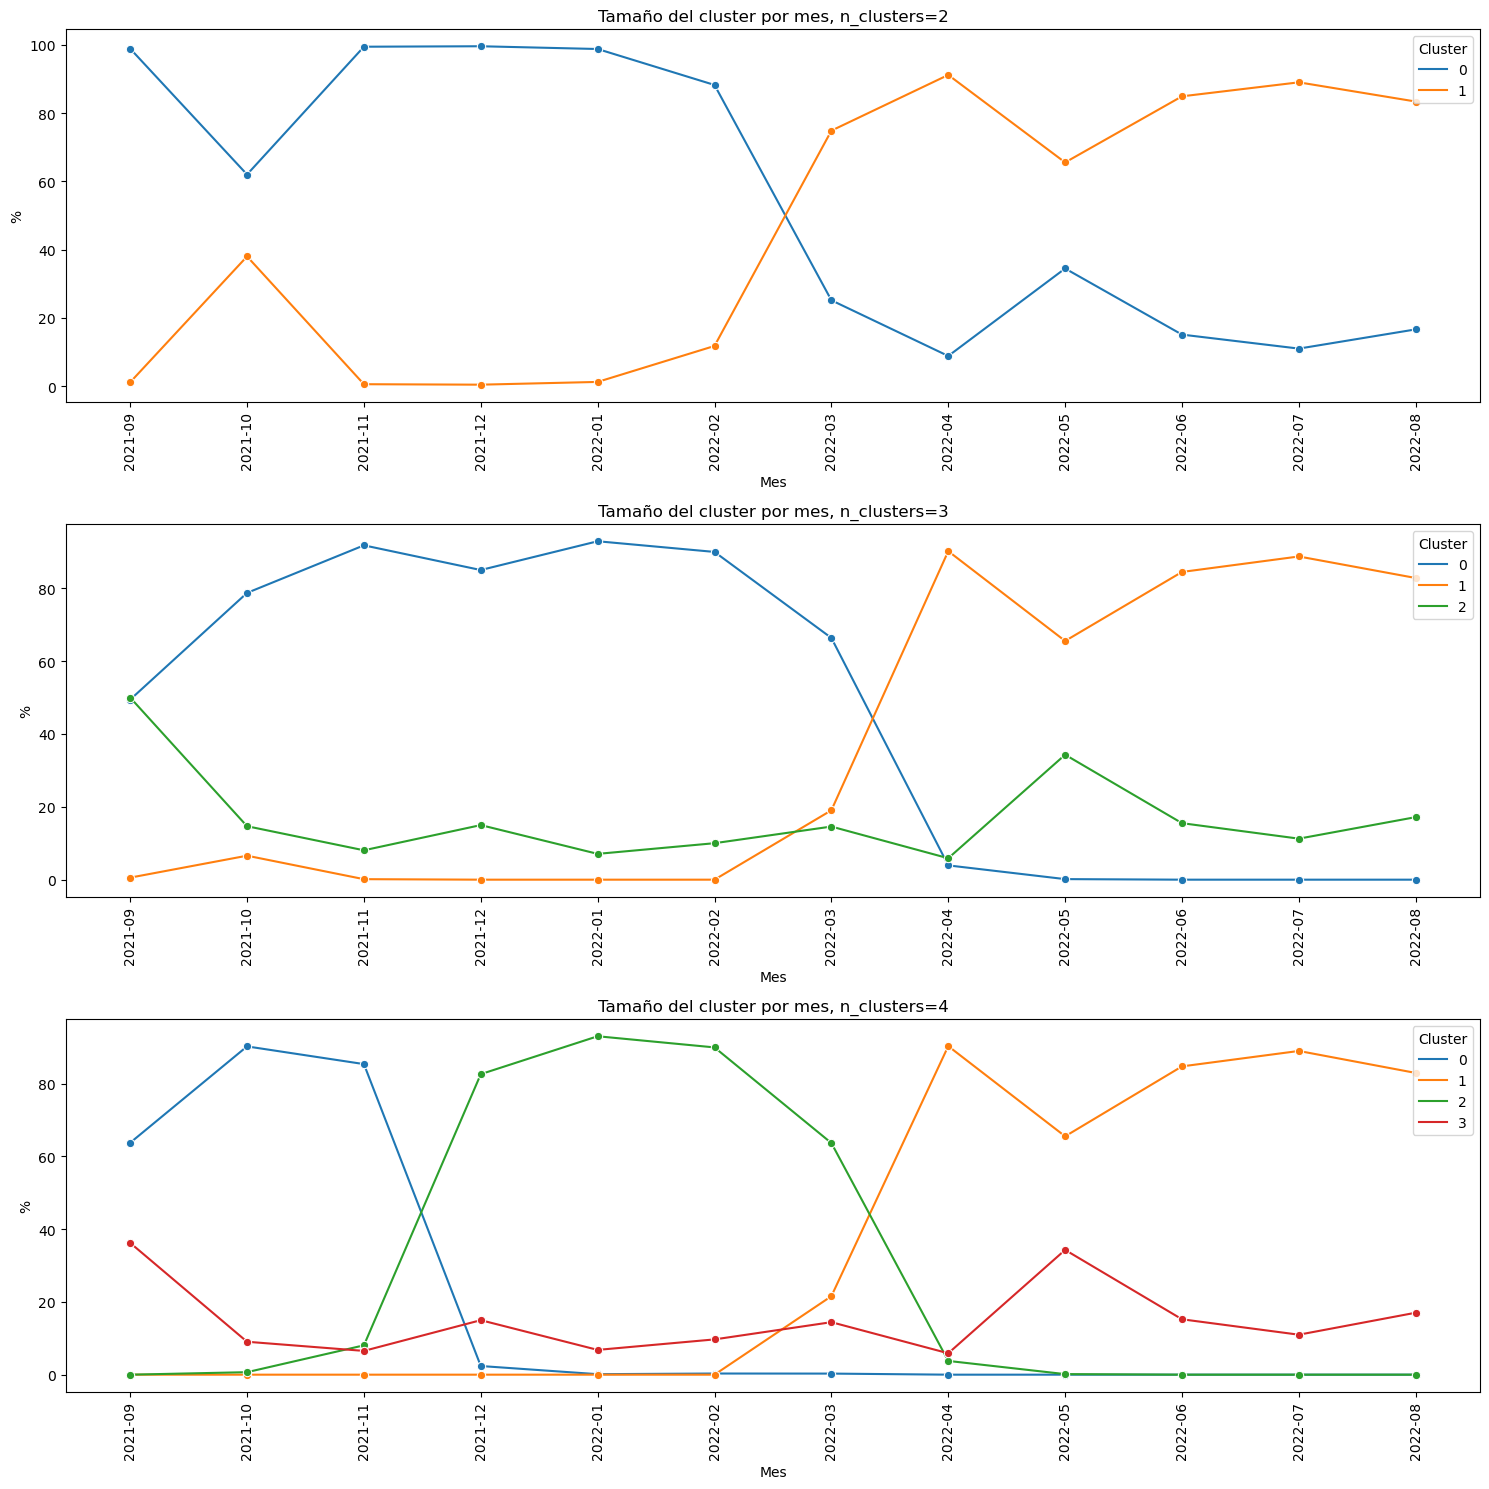

In [89]:
df_cluster = df.copy()
df_cluster['Cluster_2'] = PCA_df['Cluster_2']
df_cluster['Cluster_3'] = PCA_df['Cluster_3']
df_cluster['Cluster_4'] = PCA_df['Cluster_4']

def plot_cluster_counts(df_cluster, cluster_columns, titles):
    fig, axes = plt.subplots(nrows=len(cluster_columns), ncols=1, figsize=(15, 15))

    for i, cluster_column in enumerate(cluster_columns):
        df_cluster.index = pd.to_datetime(df_cluster.index)
        df_cluster['Month-Year'] = df_cluster.index.strftime('%Y-%m')

        # Agrupa por mes-año y el cluster especificado y cuenta las ocurrencias
        cluster_counts = df_cluster.groupby(['Month-Year', cluster_column]).size().reset_index(name='Count')

        # Asegúrate de tener todas las combinaciones de mes-año y cluster con valores cero, excluyendo marzo
        all_combinations = pd.MultiIndex.from_product([df_cluster['Month-Year'].unique(), df_cluster[cluster_column].unique()], names=['Month-Year', cluster_column])

        # Utiliza reindex para asegurarte de que todas las combinaciones estén presentes con valores cero para las faltantes
        cluster_counts = cluster_counts.set_index(['Month-Year', cluster_column]).reindex(all_combinations, fill_value=0).reset_index()

        # Calcular el total de datos en cada periodo y estandarizar 'Count'
        total_data_per_period = df_cluster.groupby('Month-Year').size().reset_index(name='TotalData')
        cluster_counts = pd.merge(cluster_counts, total_data_per_period, on='Month-Year')
        cluster_counts['%'] = cluster_counts['Count'] / cluster_counts['TotalData'] * 100
        
        # Grafica usando seaborn en el subgráfico correspondiente
        sns.lineplot(data=cluster_counts, x='Month-Year', y='%', hue=cluster_column, marker='o', palette='tab10', ax=axes[i])

        # Configuración del subgráfico
        axes[i].set_xlabel('Mes')
        axes[i].set_ylabel('%')
        axes[i].set_title(f'{titles[i]}')
        axes[i].legend(title='Cluster', loc='upper right')
        axes[i].set_xticks(range(len(axes[i].get_xticklabels()))); axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

    # Ajustes de diseño para mejorar la visualización
    plt.tight_layout()
    plt.show()

# Llamada a la función con las columnas de cluster y títulos correspondientes
plot_cluster_counts(df_cluster, ['Cluster_2', 'Cluster_3', 'Cluster_4'], ['Tamaño del cluster por mes, n_clusters=2', 'Tamaño del cluster por mes, n_clusters=3', 'Tamaño del cluster por mes, n_clusters=4'])

#### Predicción con arbol de decisión

Evaluating for Cluster_2:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       914
           1       0.97      0.93      0.95       775

    accuracy                           0.95      1689
   macro avg       0.95      0.95      0.95      1689
weighted avg       0.95      0.95      0.95      1689

Características con importancia mayor que cero:
220FV203.OUT: 0.758
2202301001SI.PNT: 0.156
220PIT063.PNT: 0.066
220PIC155.MEAS: 0.013
220SIT008B.PNT: 0.005
210WIT2094.PNT: 0.002

Llaves de características con importancia mayor que cero:
['220FV203.OUT', '2202301001SI.PNT', '220PIT063.PNT', '220PIC155.MEAS', '220SIT008B.PNT', '210WIT2094.PNT']
Evaluating for Cluster_3:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       757
           1       0.96      0.91      0.94       640
           2       0.91      0.88      0.90       292

    accuracy                           0.93      1689
   

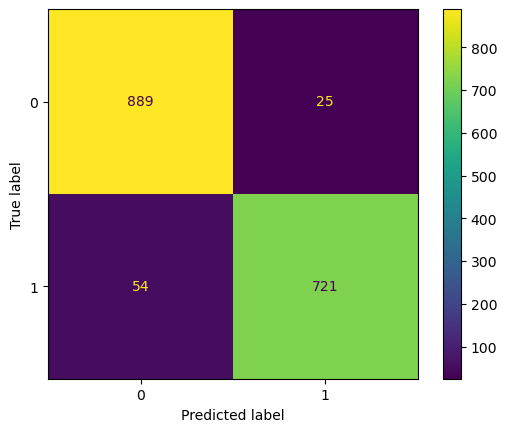

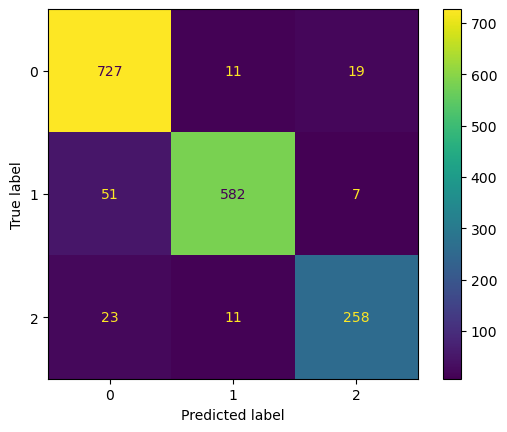

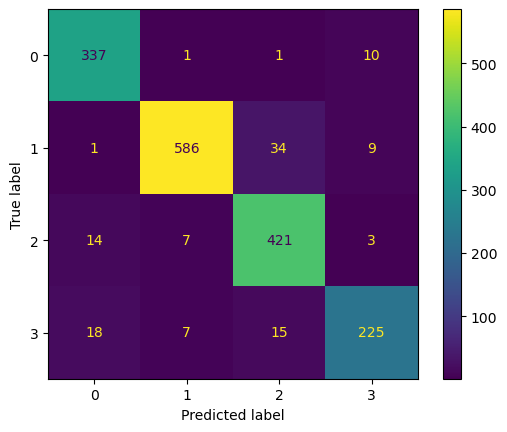

In [90]:
# Definir una lista de valores para cluster_x
cluster_values = ['Cluster_2', 'Cluster_3', 'Cluster_4']

# Iterar sobre cada valor de cluster_x
for cluster_x in cluster_values:
    print(f"Evaluating for {cluster_x}:")
    
    X = df_cluster.iloc[:,:-4]
    y = df_cluster[cluster_x]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2,
        shuffle=True,
        random_state=44
    )

    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print(classification_report(y_test, y_pred))

    confusion_mat = confusion_matrix(y_test, y_pred)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
    cm_display.plot()
    
    feature_importances = clf.feature_importances_
    feature_names = X.columns

    feature_importance_dict = dict(zip(feature_names, feature_importances))


    filtered_feature_keys = [feature for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True) if importance > 0]

    print("Características con importancia mayor que cero:")
    for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
        if importance > 0:
            print(f"{feature}: {importance:.3f}")

    print("\nLlaves de características con importancia mayor que cero:")
    print(filtered_feature_keys)

Características con importancia mayor que cero:
220FV203.OUT: 0.689
220PIC155.MEAS: 0.154
2202604801II.PNT: 0.086
2202100401SI.PNT: 0.040
220TIC533.MEAS: 0.031

Llaves de características con importancia mayor que cero:
['220FV203.OUT', '220PIC155.MEAS', '2202604801II.PNT', '2202100401SI.PNT', '220TIC533.MEAS']


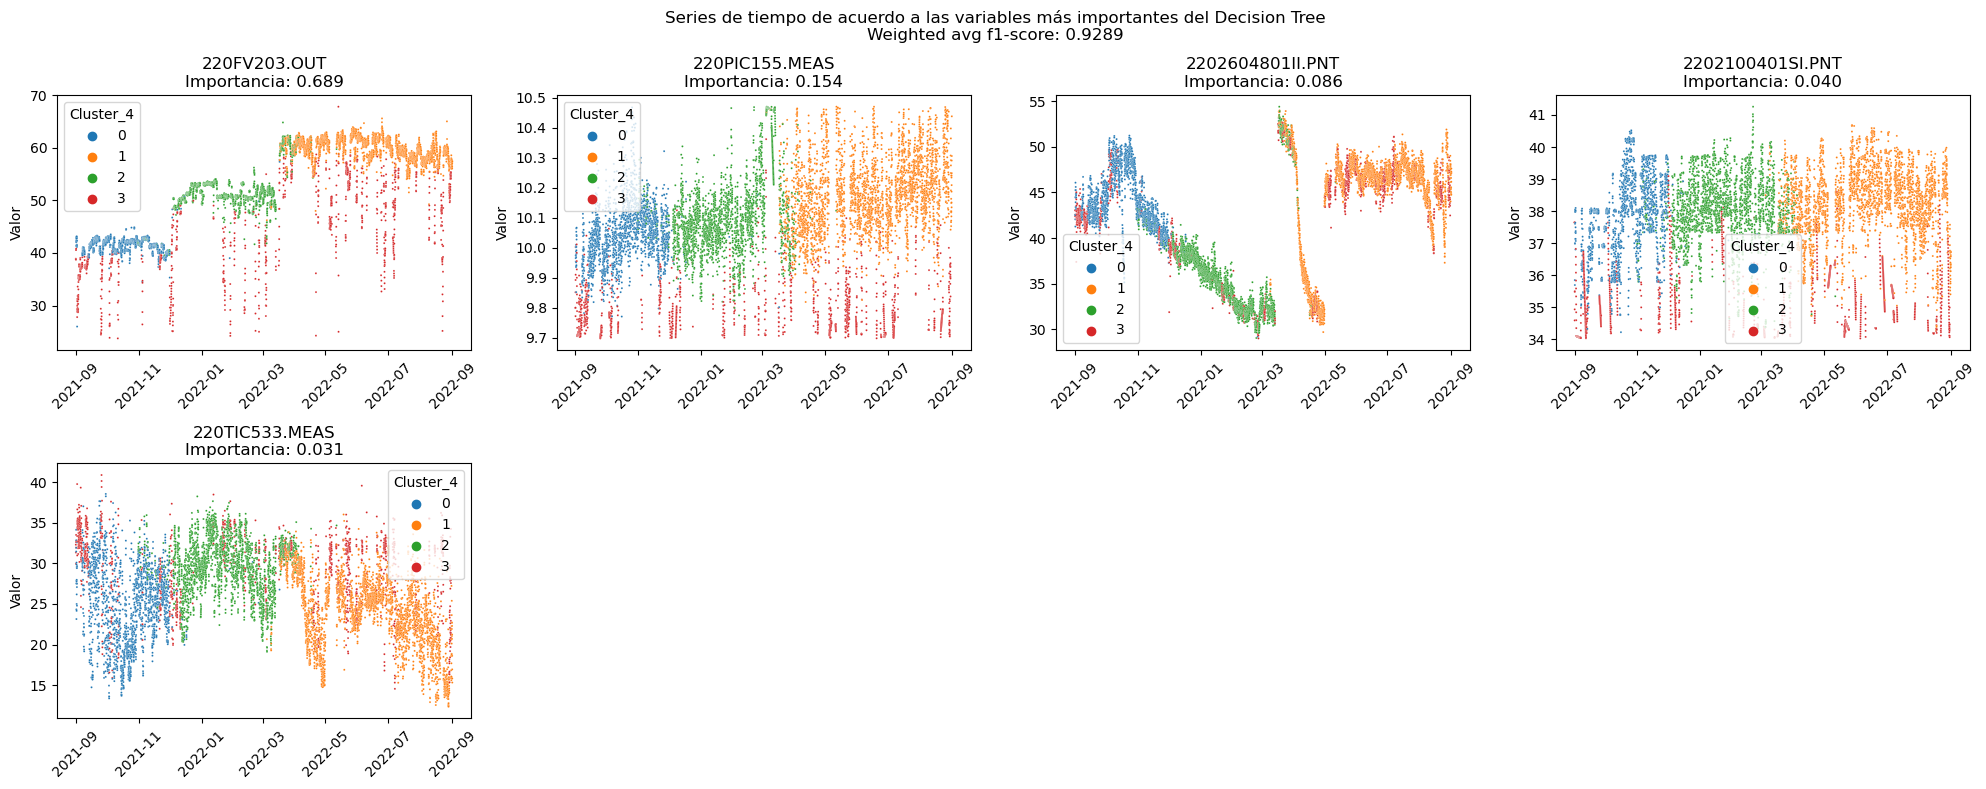

In [91]:
cluster_x = 'Cluster_4'

X = df_cluster.iloc[:,:-4]
y = df_cluster[cluster_x]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    shuffle=True,
    random_state=44
)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

feature_importances = clf.feature_importances_
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, feature_importances))

filtered_feature_keys = [feature for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True) if importance > 0]

print("Características con importancia mayor que cero:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    if importance > 0:
        print(f"{feature}: {importance:.3f}")

print("\nLlaves de características con importancia mayor que cero:")
print(filtered_feature_keys)

num_vars = len(filtered_feature_keys)
num_cols = 4
num_rows = -(-num_vars // num_cols) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows))

for i, variable in enumerate(filtered_feature_keys):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    sns.scatterplot(x=df_cluster.index, y=variable, hue=cluster_x, data=df_cluster, s=2, ax=ax, palette='tab10')
    importance_value = feature_importance_dict.get(variable, 0)  
    ax.set_title(f"{variable}\nImportancia: {importance_value:.3f}")
    ax.set_ylabel('Valor') 
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)


for i in range(num_vars, num_rows * num_cols):
    axes.flatten()[i].axis('off')
    
plt.suptitle(f"Series de tiempo de acuerdo a las variables más importantes del Decision Tree\nWeighted avg f1-score: {f1:.4f}")
    
plt.tight_layout()
plt.show()

In [92]:
with open('dfresidual1.pkl', 'rb') as archivo:
    df_original = pickle.load(archivo)
df_original

SINUSOID  220TV111A.OUT  220PIT072.PNT  220LIC154.MEAS  \
2018-01-01 00:00:00  49.152264           95.0       0.014524        0.162538   
2018-01-01 01:00:00  73.235420           95.0       0.003413       26.806496   
2018-01-01 02:00:00  91.367134           95.0       0.003074       14.038163   
2018-01-01 03:00:00  98.295097           95.0       0.003180        6.074811   
2018-01-01 04:00:00  91.981880           65.0       0.003180        3.832892   
...                        ...            ...            ...             ...   
2023-05-31 21:00:00   8.425359          100.0       0.000000       17.781645   
2023-05-31 22:00:00   1.742280          100.0       0.000000       40.442970   
2023-05-31 23:00:00   8.084702          100.0       0.000000       11.903734   
2023-06-01 00:00:00  25.063681          100.0       0.000586       13.823203   
2023-06-01 01:00:00  49.142048          100.0       0.000586       24.752346   

                     22023009V2.PNT  220HV069.OUT  2202301301II.PNT  \
2018-01-01 00:00:00             NaN           0.0              68.0   
2018-01-01 01:00:00             NaN           0.0              68.0   
2018-01-01 02:00:00             NaN           0.0              68.0   
2018-01-01 03:00:00             NaN           0.0              68.0   
2018-01-01 04:00:00             NaN           0.0              68.0   
...                             ...           ...               ...   
2023-05-31 21:00:00           -1.67           0.0              71.0   
2023-05-31 22:00:00           -1.67           0.0              71.0   
2023-05-31 23:00:00           -1.67           0.0              71.0   
2023-06-01 00:00:00           -1.67           0.0              71.0   
2023-06-01 01:00:00           -1.67           0.0              71.0   

                     220HV102.OUT  220PV155.OUT  22023010V3.PNT  \
2018-01-01 00:00:00          80.0           0.0        3.101010   
2018-01-01 01:00:00          80.0           0.0        3.508585   
2018-01-01 02:00:00          80.0           0.0        3.205553   
2018-01-01 03:00:00          80.0           0.0        3.367718   
2018-01-01 04:00:00          80.0           0.0        4.129462   
...                           ...           ...             ...   
2023-05-31 21:00:00          80.0           0.0       -1.670000   
2023-05-31 22:00:00          80.0           0.0       -1.670000   
2023-05-31 23:00:00          80.0           0.0       -1.670000   
2023-06-01 00:00:00          80.0           0.0       -1.670000   
2023-06-01 01:00:00          80.0           0.0       -1.670000   

                     22023009V3.PNT  220FV103.OUT  220FV089.OUT  \
2018-01-01 00:00:00        1.728984           0.0          70.0   
2018-01-01 01:00:00        2.490404           0.0          70.0   
2018-01-01 02:00:00        2.647163           0.0          70.0   
2018-01-01 03:00:00        2.584136           0.0          70.0   
2018-01-01 04:00:00        1.944880           0.0          70.0   
...                             ...           ...           ...   
2023-05-31 21:00:00       -1.670000           0.0          70.0   
2023-05-31 22:00:00       -1.670000           0.0          70.0   
2023-05-31 23:00:00       -1.670000           0.0          70.0   
2023-06-01 00:00:00       -1.670000           0.0          70.0   
2023-06-01 01:00:00       -1.670000           0.0          70.0   

                     220FIC103.MEAS  220SIT008B.PNT  220HV179.PNT  \
2018-01-01 00:00:00        0.013672       38.012939           6.0   
2018-01-01 01:00:00        0.013672       37.868355           6.0   
2018-01-01 02:00:00        0.013671       38.367470           6.0   
2018-01-01 03:00:00        0.013672       39.135635           6.0   
2018-01-01 04:00:00        0.013667       38.771118           6.0   
...                             ...             ...           ...   
2023-05-31 21:00:00        0.003315       39.698544           6.0   
2023-05-31 22:00:00        0.003315       38.8

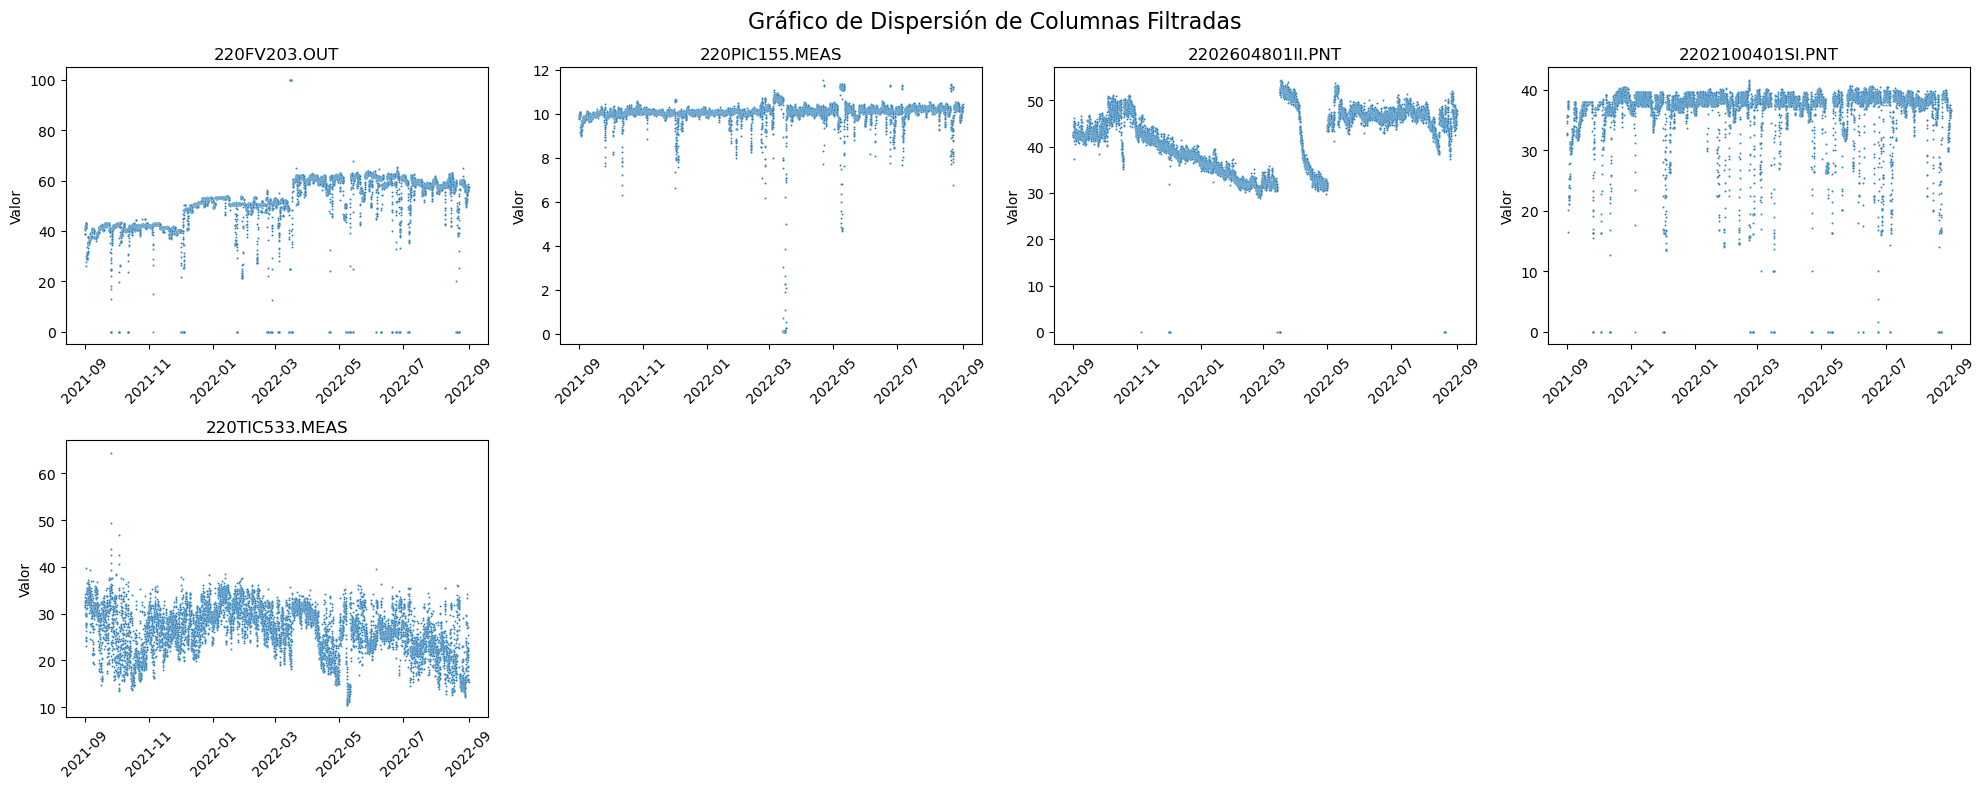

In [93]:
df_original = df_original.loc['2021-09-01':'2022-08-31']

num_vars = len(filtered_feature_keys)
num_cols = 4
num_rows = -(-num_vars // num_cols)  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows))

for i, column in enumerate(filtered_feature_keys):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=df_original.index, y=df_original[column], s=2, ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('Valor')
    axes[row, col].tick_params(axis='x', rotation=45)

for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

fig.suptitle('Gráfico de Dispersión de Columnas Filtradas', fontsize=16)
plt.tight_layout()
plt.show()

#### Correlación Variables Importantes

In [94]:
df_train = pd.read_pickle('df_train.csv')

correlation_matrix = df_train.corr()
columna_de_interes = '220FT108.MEAS'
correlation_with_target = correlation_matrix[columna_de_interes]
correlation_with_target_sorted = correlation_with_target[correlation_with_target>0.4].sort_values(ascending=False).round(2)
print(correlation_with_target_sorted)

220FT108.MEAS            1.00
220FX108.PNT             0.99
220FV108.OUT             0.89
220LICORBRANCO.RO0003    0.69
210WIT2094.PNT           0.69
220FIT107.PNT            0.61
220PIT061.PNT            0.57
220TIT092.PNT            0.57
220PIT064.PNT            0.55
220PIT063.PNT            0.55
220FV203.OUT             0.54
220YIC008.MEAS           0.51
220PIC155.MEAS           0.51
220AIT473.PNT            0.51
220PIT106.PNT            0.49
220PIT167.PNT            0.49
2202301401II.PNT         0.47
220PIT062.PNT            0.47
220PIC019.MEAS           0.45
220SIT008B.PNT           0.44
220PV019B.OUT            0.44
220SIT008A.PNT           0.43
220LV006.OUT             0.42
2202100401SI.PNT         0.41
2202537801iI.PNT         0.41
220PIT072.PNT            0.41
Name: 220FT108.MEAS, dtype: float64


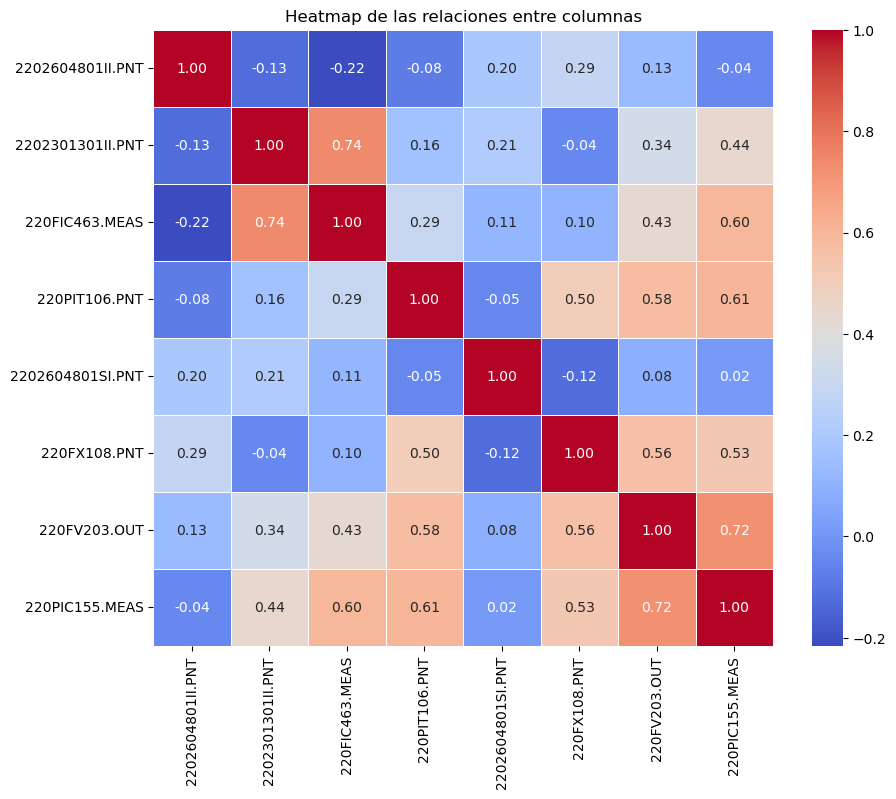

In [95]:
df_train = pd.read_pickle('df_train.csv')

# Filtrar las columnas específicas que deseas incluir en el heatmap
columnas_de_interes = ['2202604801II.PNT', '2202301301II.PNT', '220FIC463.MEAS', '220PIT106.PNT', '2202604801SI.PNT', '220FX108.PNT', '220FV203.OUT', '220PIC155.MEAS']
df_train_filtrado = df_train[columnas_de_interes]

# Calcular la matriz de correlación
matriz_correlacion = df_train_filtrado.corr()

# Crear el heatmap usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de las relaciones entre columnas')
plt.show()

In [97]:
filtro_1 = df_train.loc['2018-04-01':'2019-02-28']
filtro_2 = df_train.loc['2019-04-01':'2020-02-28']
filtro_3 = df_train.loc['2021-09-01':'2022-08-31']

resultados = {}

for columna in columnas_de_interes:
    resultados_columna = {}
    for i, filtro in enumerate([filtro_1, filtro_2, filtro_3], start=1):
        promedio = round(filtro[columna].mean(), 2)
        desviacion_estandar = round(filtro[columna].std(), 2)
        minimo = round(filtro[columna].min(), 2)
        maximo = round(filtro[columna].max(), 2)      
        resultados_columna[f'Filtro_{i}'] = {'Promedio': promedio, 'Desviacion_Estandar': desviacion_estandar, 'Minimo': minimo, 'Maximo': maximo}
    resultados[columna] = resultados_columna
    
df_filtros = pd.DataFrame()
for columna, filtros in resultados.items():
    for filtro, stats in filtros.items():
        promedio_str = f"{stats['Promedio']:.1f}±{stats['Desviacion_Estandar']:.1f}"
        rango_str = f"{stats['Minimo']:.1f}-{stats['Maximo']:.1f}"
        df_filtros.loc[columna, filtro] = f"{promedio_str} || {rango_str}"
df_filtros

Filtro_1               Filtro_2  \
2202604801II.PNT  41.9±9.1 || 26.8-56.7  37.1±3.8 || 19.4-53.1   
2202301301II.PNT  66.0±2.9 || 56.0-74.0  62.6±2.6 || 56.0-71.0   
220FIC463.MEAS    32.0±3.6 || 21.9-37.4  34.0±4.0 || 21.9-44.0   
220PIT106.PNT       9.6±0.3 || 8.5-10.5    9.5±0.3 || 8.5-10.1   
2202604801SI.PNT  73.9±0.5 || 67.2-75.0  71.5±2.4 || 68.7-76.6   
220FX108.PNT      56.8±6.6 || 31.4-69.3  56.0±6.0 || 31.4-70.7   
220FV203.OUT      50.1±6.6 || 25.0-65.0  45.7±9.5 || 23.6-60.3   
220PIC155.MEAS     10.0±0.1 || 9.6-10.5   10.0±0.2 || 9.6-10.5   

                               Filtro_3  
2202604801II.PNT  41.9±6.0 || 29.0-54.4  
2202301301II.PNT  68.8±3.2 || 56.0-80.0  
220FIC463.MEAS    39.1±4.3 || 21.9-46.2  
220PIT106.PNT       9.6±0.5 || 8.5-10.5  
2202604801SI.PNT  75.7±2.5 || 71.9-78.1  
220FX108.PNT      52.6±5.4 || 31.4-65.6  
220FV203.OUT      51.3±8.4 || 23.7-67.8  
220PIC155.MEAS     10.1±0.2 || 9.6-10.6

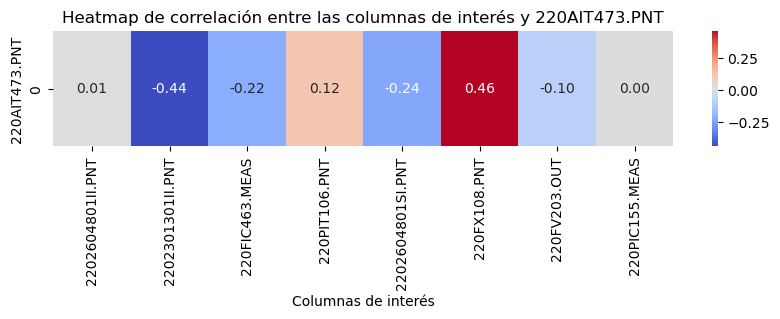

In [98]:
plt.figure(figsize=(10, 1.5))
correlacion_RT = df_train[columnas_de_interes].corrwith(df_train['220AIT473.PNT'])
sns.heatmap(pd.Series(correlacion_RT).to_frame().T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlación entre las columnas de interés y 220AIT473.PNT')
plt.xlabel('Columnas de interés')
plt.ylabel('220AIT473.PNT')
plt.show()

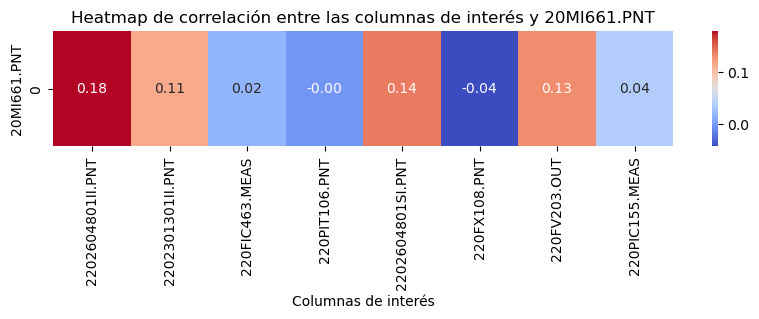

In [99]:
plt.figure(figsize=(10, 1.5))
correlacion_RT = df_train[columnas_de_interes].corrwith(df_train['20MI661.PNT'])
sns.heatmap(pd.Series(correlacion_RT).to_frame().T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlación entre las columnas de interés y 20MI661.PNT')
plt.xlabel('Columnas de interés')
plt.ylabel('20MI661.PNT')
plt.show()

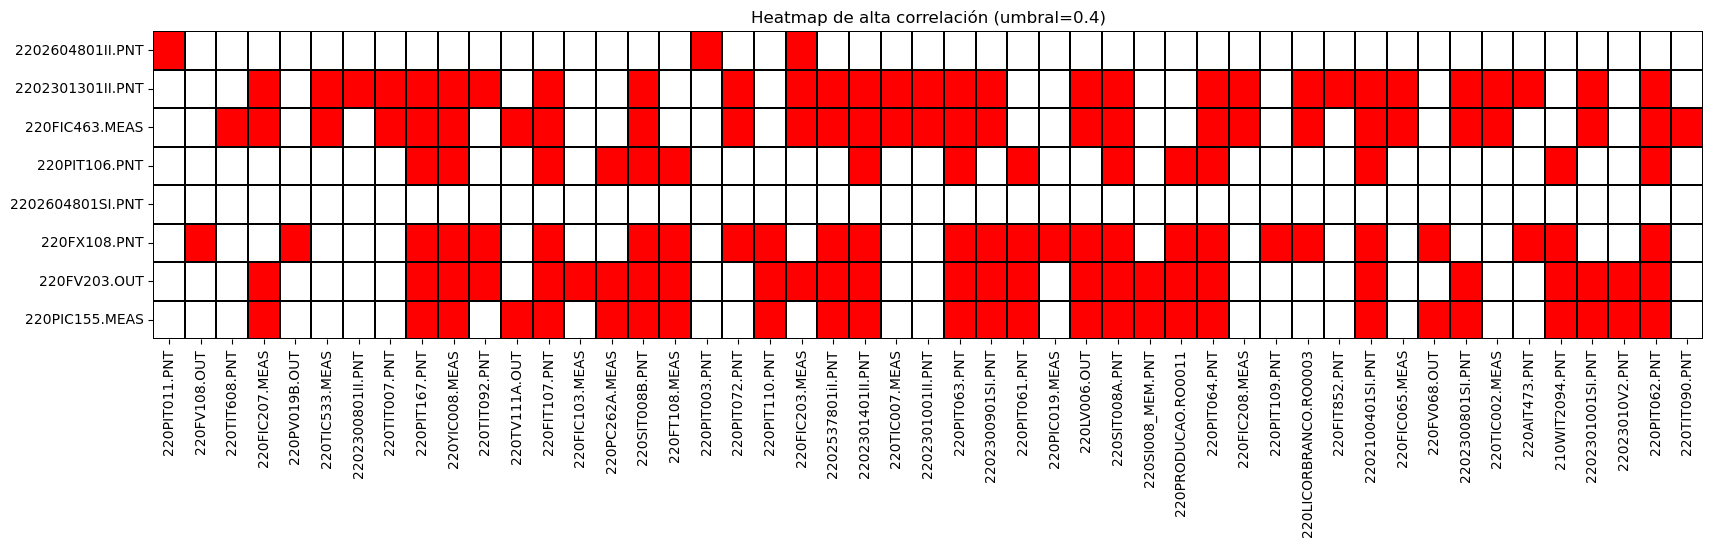

Variable  Numero_True
30    220SIT008A.PNT            6
15    220SIT008B.PNT            6
47     220PIT062.PNT            6
38  2202100401SI.PNT            6
22  2202301401II.PNT            6
25     220PIT063.PNT            6
8      220PIT167.PNT            6
9     220YIC008.MEAS            6
33     220PIT064.PNT            6
12     220FIT107.PNT            6

In [103]:
resultados_correlacion = pd.DataFrame(index=columnas_de_interes, columns=list(set(df_train.columns)-set(columnas_de_interes)))

for columna in columnas_de_interes:
    correlacion = df_train.corrwith(df_train[columna])
    resultados_correlacion.loc[columna] = correlacion.abs()

umbral_alto = 0.4
alta_correlacion = (resultados_correlacion > umbral_alto)
alta_correlacion = alta_correlacion.loc[:, alta_correlacion.any()]
longitud_columnas = len(alta_correlacion.columns)

binary_df = alta_correlacion.astype(int)

plt.figure(figsize=(20, 4))
sns.heatmap(binary_df, cmap=['white', 'red'], linecolor='black', linewidths=0.1, cbar=False)
plt.title(f'Heatmap de alta correlación (umbral={umbral_alto})')
plt.show()

cantidad_true_por_columna = alta_correlacion.sum()
df_true_counts = pd.DataFrame({'Variable': cantidad_true_por_columna.index, 'Numero_True': cantidad_true_por_columna.values})
df_true_counts = df_true_counts.sort_values(by='Numero_True', ascending=False)
df_true_counts = df_true_counts[df_true_counts['Numero_True'] == df_true_counts['Numero_True'].max()]
df_true_counts

In [104]:
df_true_counts['Variable']

30      220SIT008A.PNT
15      220SIT008B.PNT
47       220PIT062.PNT
38    2202100401SI.PNT
22    2202301401II.PNT
25       220PIT063.PNT
8        220PIT167.PNT
9       220YIC008.MEAS
33       220PIT064.PNT
12       220FIT107.PNT
Name: Variable, dtype: object

## FIN